In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import seaborn as sns 
from tabulate import tabulate               
import matplotlib as mat 

In [2]:
emp_df = pd.read_csv("DS1_C5_S1_EmployeeAttrition_Data_Practice.csv")
emp_df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,OverTime,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.0,Yes,Travel_Rarely,Sales,1,Life Sciences,1,2,Female,94,...,Yes,3,1,8,0,1,6,4,0,5
1,49.0,No,Travel_Frequently,Research & Development,8,Life Sciences,2,3,Male,61,...,No,4,4,10,3,3,10,7,1,7
2,37.0,Yes,Travel_Rarely,Research & Development,2,Other,4,4,Male,92,...,Yes,3,2,7,3,3,0,0,0,0
3,33.0,No,Travel_Frequently,Research & Development,3,Life Sciences,5,4,Female,56,...,Yes,3,3,8,3,3,8,7,3,0
4,27.0,No,Travel_Rarely,Research & Development,2,Medical,7,1,Male,40,...,No,3,4,6,3,3,2,2,2,2


TASK 1

In [3]:
##displaying column names in the dataframe

emp_df.columns    

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'EducationField', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PerformanceRating', 'RelationshipSatisfaction',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [4]:
##displaying count of non null records

emp_df.notnull().sum()

Age                         1446
Attrition                   1470
BusinessTravel              1440
Department                  1466
DistanceFromHome            1470
EducationField              1458
EmployeeNumber              1470
EnvironmentSatisfaction     1470
Gender                      1425
HourlyRate                  1470
JobInvolvement              1470
JobRole                     1460
JobSatisfaction             1470
MaritalStatus               1414
MonthlyIncome               1470
NumCompaniesWorked          1470
Over18                      1416
OverTime                    1470
PerformanceRating           1470
RelationshipSatisfaction    1470
TotalWorkingYears           1470
TrainingTimesLastYear       1470
WorkLifeBalance             1470
YearsAtCompany              1470
YearsInCurrentRole          1470
YearsSinceLastPromotion     1470
YearsWithCurrManager        1470
dtype: int64

In [92]:
##displaying datatype of columns

emp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1446 non-null   float64
 1   Attrition                 1470 non-null   object 
 2   BusinessTravel            1470 non-null   object 
 3   Department                1470 non-null   object 
 4   DistanceFromHome          1470 non-null   int64  
 5   EducationField            1470 non-null   object 
 6   EmployeeNumber            1470 non-null   int64  
 7   EnvironmentSatisfaction   1470 non-null   int64  
 8   Gender                    1470 non-null   object 
 9   HourlyRate                1470 non-null   int64  
 10  JobInvolvement            1470 non-null   int64  
 11  JobRole                   1470 non-null   object 
 12  JobSatisfaction           1470 non-null   int64  
 13  MaritalStatus             1470 non-null   object 
 14  MonthlyI

TASK 2

In [93]:
##displaying unique characters in the columns to identify the categorical and numerical datatype

emp_df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
Department                     3
DistanceFromHome              29
EducationField                 6
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PerformanceRating              2
RelationshipSatisfaction       4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCompany                37
YearsInCurrentRole            19
YearsSinceLastPromotion       16
YearsWithCurrManager          18
dtype: int64

In [6]:
def seprate_data_types(emp_df):
    categorical = []
    continuous = []
    for column in emp_df.columns:                
        if emp_df[column].nunique() < 35:  ##putting 35 here...its a hyperparameter here and can be changed     
                                                    
            categorical.append(column)
        else:
            continuous.append(column)
            
    return categorical, continuous 


categorical, continuous = seprate_data_types(emp_df)         


from tabulate import tabulate
table = [categorical,  continuous]
print(tabulate({"Categorical":categorical,
                "continuous": continuous}, headers = ["categorical", "continuous"]))

categorical               continuous
------------------------  -----------------
Attrition                 Age
BusinessTravel            EmployeeNumber
Department                HourlyRate
DistanceFromHome          MonthlyIncome
EducationField            TotalWorkingYears
EnvironmentSatisfaction   YearsAtCompany
Gender
JobInvolvement
JobRole
JobSatisfaction
MaritalStatus
NumCompaniesWorked
Over18
OverTime
PerformanceRating
RelationshipSatisfaction
TrainingTimesLastYear
WorkLifeBalance
YearsInCurrentRole
YearsSinceLastPromotion
YearsWithCurrManager


TASK 3

In [7]:
##defining function for the descriptive analysis

def info_of_cat (col):
    print(f'Unique value in {col} are: {emp_df[col].unique()}')
    print("-"*60)
    print(f"Mode of {col} is {emp_df[col].mode()[0]}")
    print("-"*60)
    print(f"No of missing values in {col} is {emp_df[col].isnull().sum()}")

In [8]:
## ATTRITION

info_of_cat("Attrition")

Unique value in Attrition are: ['Yes' 'No']
------------------------------------------------------------
Mode of Attrition is No
------------------------------------------------------------
No of missing values in Attrition is 0


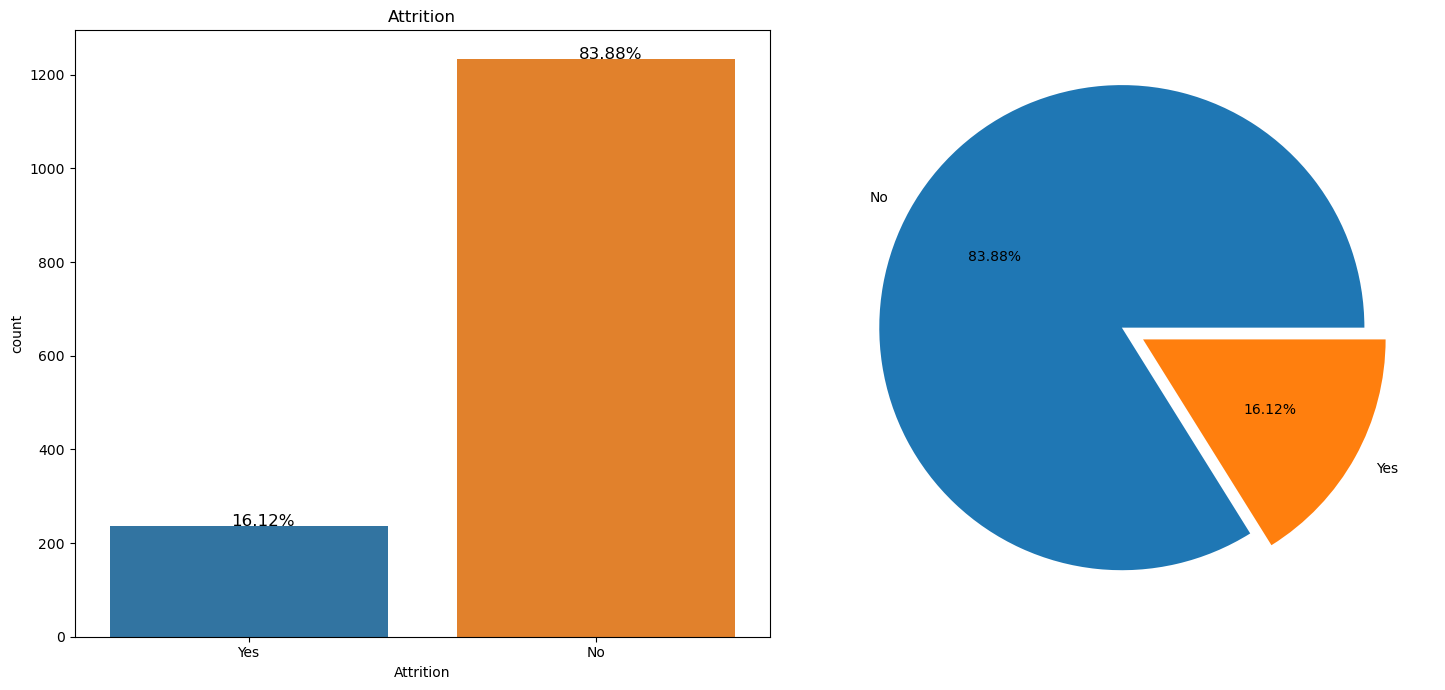

In [9]:
##plotting the reguired graph for better visualisation of data

fig, ax = plt.subplots(1,2,figsize = (15, 7))
ax[0].set_title("Attrition")                  
percentage = emp_df["Attrition"].value_counts()         
labels = list(emp_df["Attrition"].value_counts().index) 

ax = sns.countplot(x = emp_df["Attrition"], ax = ax[0])
plt.pie(percentage, autopct= "%0.2f%%", labels = labels, explode = [.05, .05])
total = len(emp_df['Attrition'])
for p in ax.patches:
    percentage = '{:.2f}%'.format(100*p.get_height()/total)
    x = p.get_x() + p.get_width()/2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage,(x,y), size = 12)

plt.tight_layout()

In [10]:
## BUSINESS TRAVEL

info_of_cat("BusinessTravel")

Unique value in BusinessTravel are: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel' nan]
------------------------------------------------------------
Mode of BusinessTravel is Travel_Rarely
------------------------------------------------------------
No of missing values in BusinessTravel is 30


In [11]:
##filling the missing values

BusinessTravel_m = emp_df['BusinessTravel'].mode()[0]
print(BusinessTravel_m)
emp_df["BusinessTravel"].fillna(BusinessTravel_m, inplace = True)

Travel_Rarely


In [12]:
##checking if the missing values get filled or not

info_of_cat("BusinessTravel")

Unique value in BusinessTravel are: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
------------------------------------------------------------
Mode of BusinessTravel is Travel_Rarely
------------------------------------------------------------
No of missing values in BusinessTravel is 0


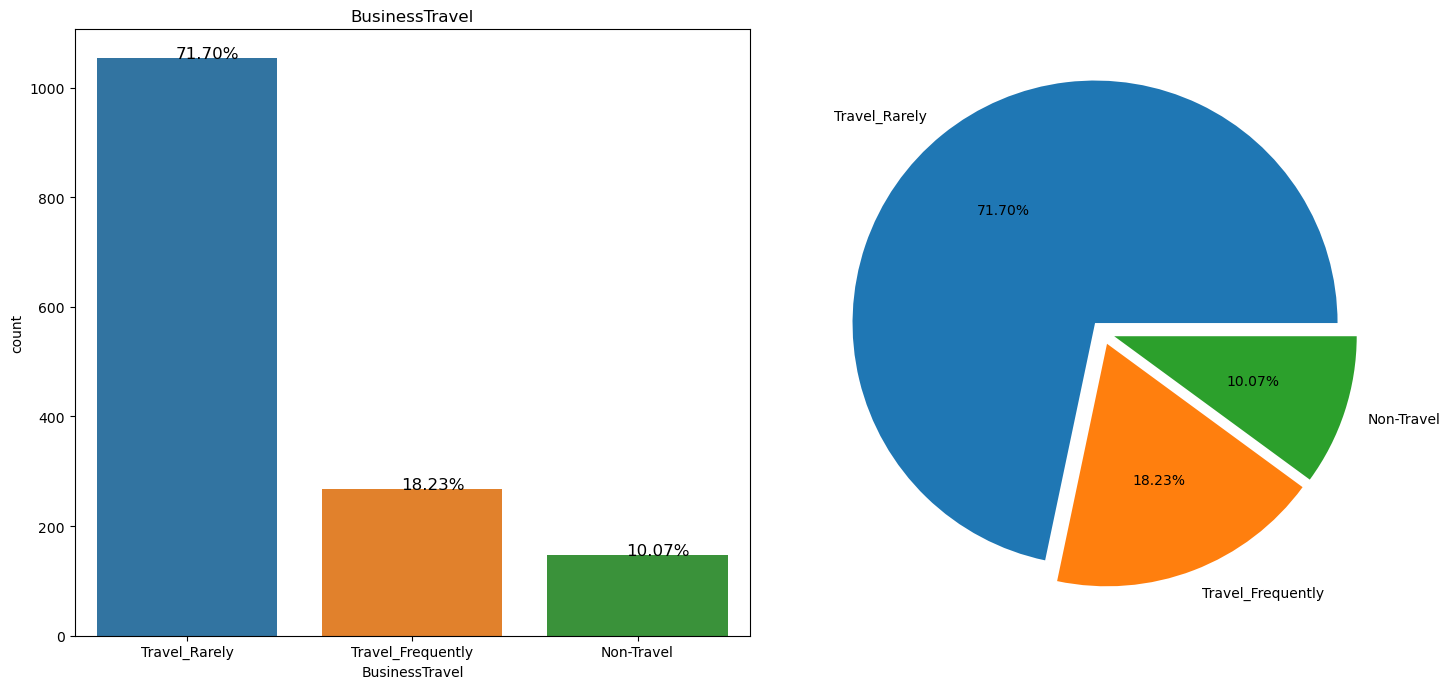

In [13]:
##plotting the reguired graph for better visualisation of data

fig, ax = plt.subplots(1,2,figsize = (15, 7))
ax[0].set_title("BusinessTravel")                  
percentage = emp_df["BusinessTravel"].value_counts()         
labels = list(emp_df["BusinessTravel"].value_counts().index) 

ax = sns.countplot(x = emp_df["BusinessTravel"], ax = ax[0])
plt.pie(percentage, autopct= "%0.2f%%", labels = labels, explode = [.05, .05, 0.05])
total = len(emp_df['BusinessTravel'])
for p in ax.patches:
    percentage = '{:.2f}%'.format(100*p.get_height()/total)
    x = p.get_x() + p.get_width()/2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage,(x,y), size = 12)

plt.tight_layout()

In [8]:
## EDUCATIONFIELD

info_of_cat('EducationField')

Unique value in EducationField are: ['Life Sciences' 'Other' 'Medical' 'Marketing' nan 'Technical Degree'
 'Human Resources']
------------------------------------------------------------
Mode of EducationField is Life Sciences
------------------------------------------------------------
No of missing values in EducationField is 12


In [9]:
##filling the missing values

EducationField_m = emp_df['EducationField'].mode()[0]
print(EducationField_m)
emp_df["EducationField"].fillna(EducationField_m, inplace = True)

Life Sciences


In [10]:
##checking if the missing values get filled or not

info_of_cat('EducationField')

Unique value in EducationField are: ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
------------------------------------------------------------
Mode of EducationField is Life Sciences
------------------------------------------------------------
No of missing values in EducationField is 0


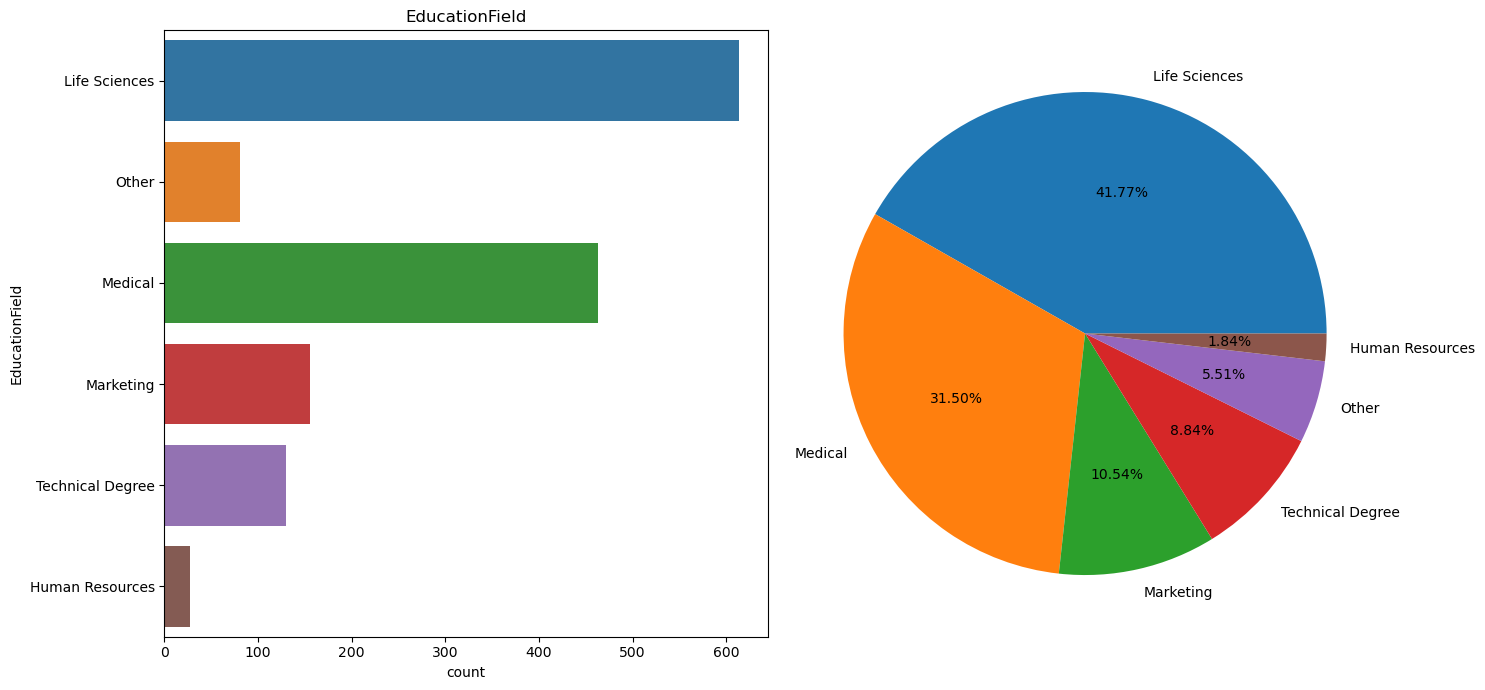

In [11]:
##plotting the reguired graph for better visualisation of data

fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("EducationField")                  
percentage = emp_df["EducationField"].value_counts()         
labels = list(emp_df["EducationField"].value_counts().index) 

sns.countplot(y = emp_df["EducationField"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  

plt.tight_layout()

In [12]:
## JOBROLE

info_of_cat("JobRole")

Unique value in JobRole are: ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' nan 'Human Resources']
------------------------------------------------------------
Mode of JobRole is Sales Executive
------------------------------------------------------------
No of missing values in JobRole is 10


In [13]:
##filling the missing values

JobRole_m = emp_df['JobRole'].mode()[0]
print(JobRole_m)
emp_df["JobRole"].fillna(JobRole_m, inplace = True)

Sales Executive


In [14]:
##checking if the missing values get filled or not

info_of_cat('JobRole')

Unique value in JobRole are: ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
------------------------------------------------------------
Mode of JobRole is Sales Executive
------------------------------------------------------------
No of missing values in JobRole is 0


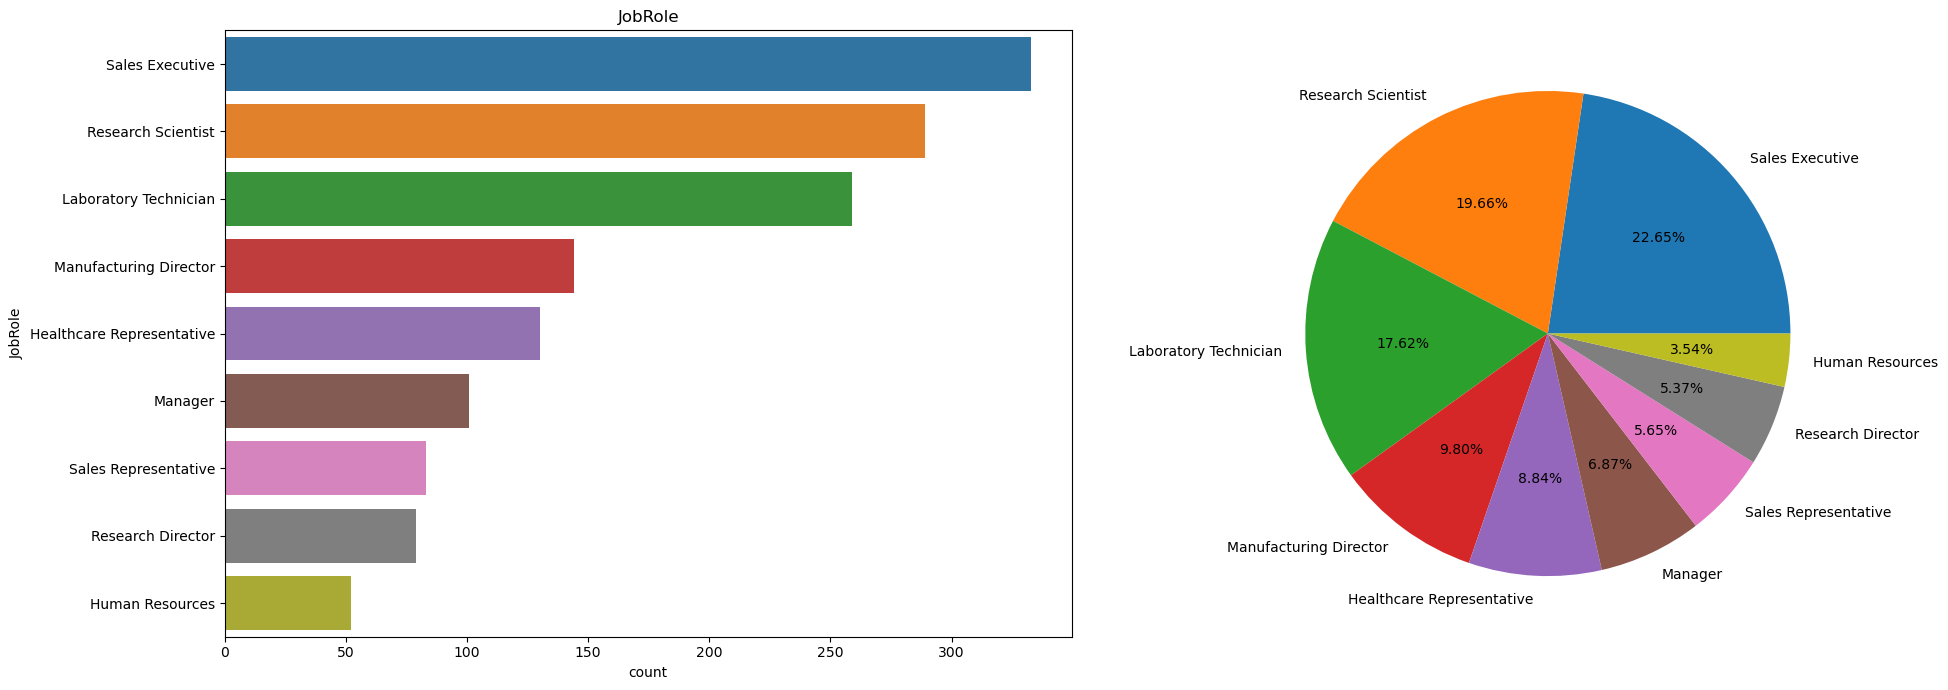

In [15]:
##plotting the reguired graph for better visualisation of data

fig, ax = plt.subplots(1, 2, figsize = (20, 7))
ax[0].set_title("JobRole")                  
percentage = emp_df["JobRole"].value_counts()         
labels = list(emp_df["JobRole"].value_counts().index) 

sns.countplot(y = emp_df["JobRole"], ax = ax[0])
plt.pie(percentage, labels = labels , autopct= "%0.2f%%") 

plt.tight_layout()

In [16]:
## MARITAL STATUS

info_of_cat('MaritalStatus')

Unique value in MaritalStatus are: ['Single' 'Married' nan 'Divorced']
------------------------------------------------------------
Mode of MaritalStatus is Married
------------------------------------------------------------
No of missing values in MaritalStatus is 56


In [17]:
##filling the missing values

MaritalStatus_m = emp_df['MaritalStatus'].mode()[0]
print(MaritalStatus_m)
emp_df["MaritalStatus"].fillna(MaritalStatus_m, inplace = True)

Married


In [18]:
##checking if the missing values get filled or not

info_of_cat("MaritalStatus")

Unique value in MaritalStatus are: ['Single' 'Married' 'Divorced']
------------------------------------------------------------
Mode of MaritalStatus is Married
------------------------------------------------------------
No of missing values in MaritalStatus is 0


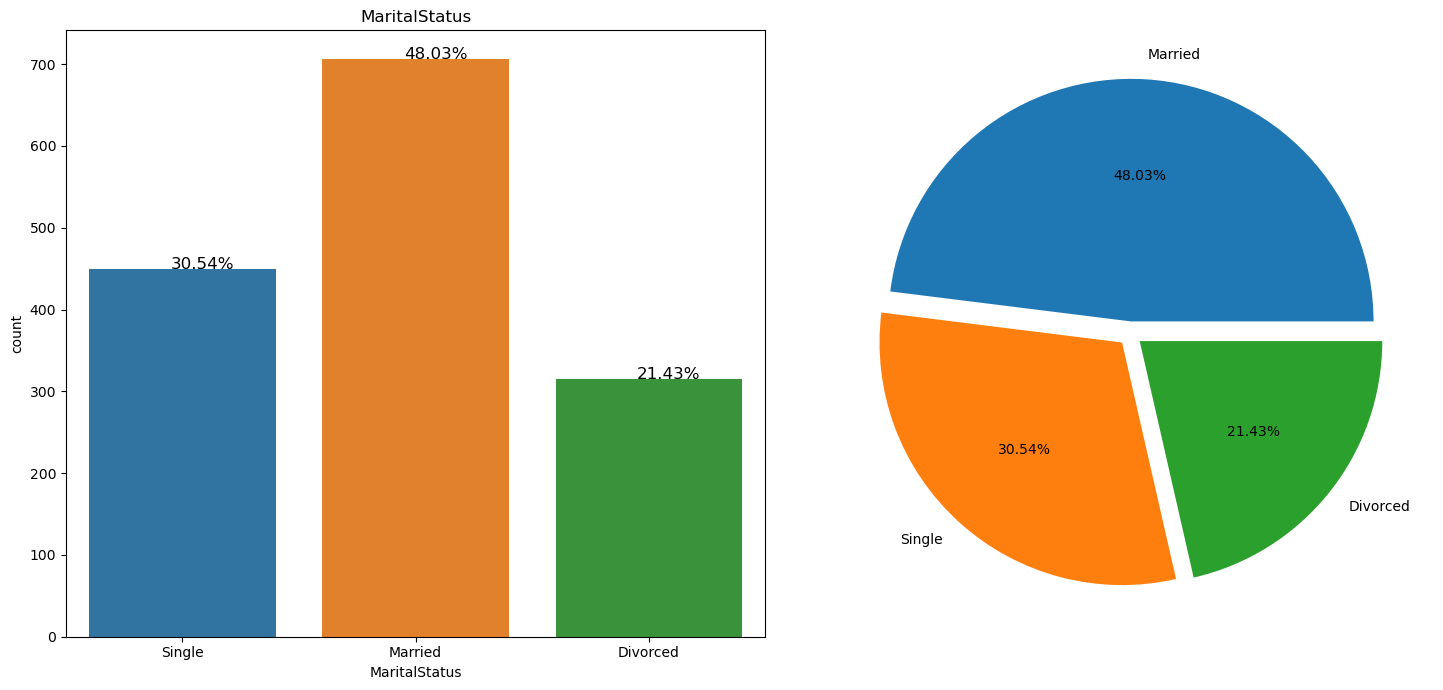

In [19]:
##plotting the reguired graph for better visualisation of data

fig, ax = plt.subplots(1,2,figsize = (15, 7))
ax[0].set_title("MaritalStatus")                  
percentage = emp_df["MaritalStatus"].value_counts()         
labels = list(emp_df["MaritalStatus"].value_counts().index) 

ax = sns.countplot(x = emp_df["MaritalStatus"], ax = ax[0])
plt.pie(percentage, autopct= "%0.2f%%", labels = labels, explode = [.05, .05, .05])
total = len(emp_df['MaritalStatus'])
for p in ax.patches:
    percentage = '{:.2f}%'.format(100*p.get_height()/total)
    x = p.get_x() + p.get_width()/2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage,(x,y), size = 12)

plt.tight_layout()

In [20]:
## GENDER

info_of_cat("Gender")

Unique value in Gender are: ['Female' 'Male' nan]
------------------------------------------------------------
Mode of Gender is Male
------------------------------------------------------------
No of missing values in Gender is 45


In [21]:
##filling the missing values

Gender_m = emp_df['Gender'].mode()[0]
print(Gender_m)
emp_df["Gender"].fillna(Gender_m, inplace = True)

Male


In [22]:
##checking if the missing values get filled or not

info_of_cat("Gender")

Unique value in Gender are: ['Female' 'Male']
------------------------------------------------------------
Mode of Gender is Male
------------------------------------------------------------
No of missing values in Gender is 0


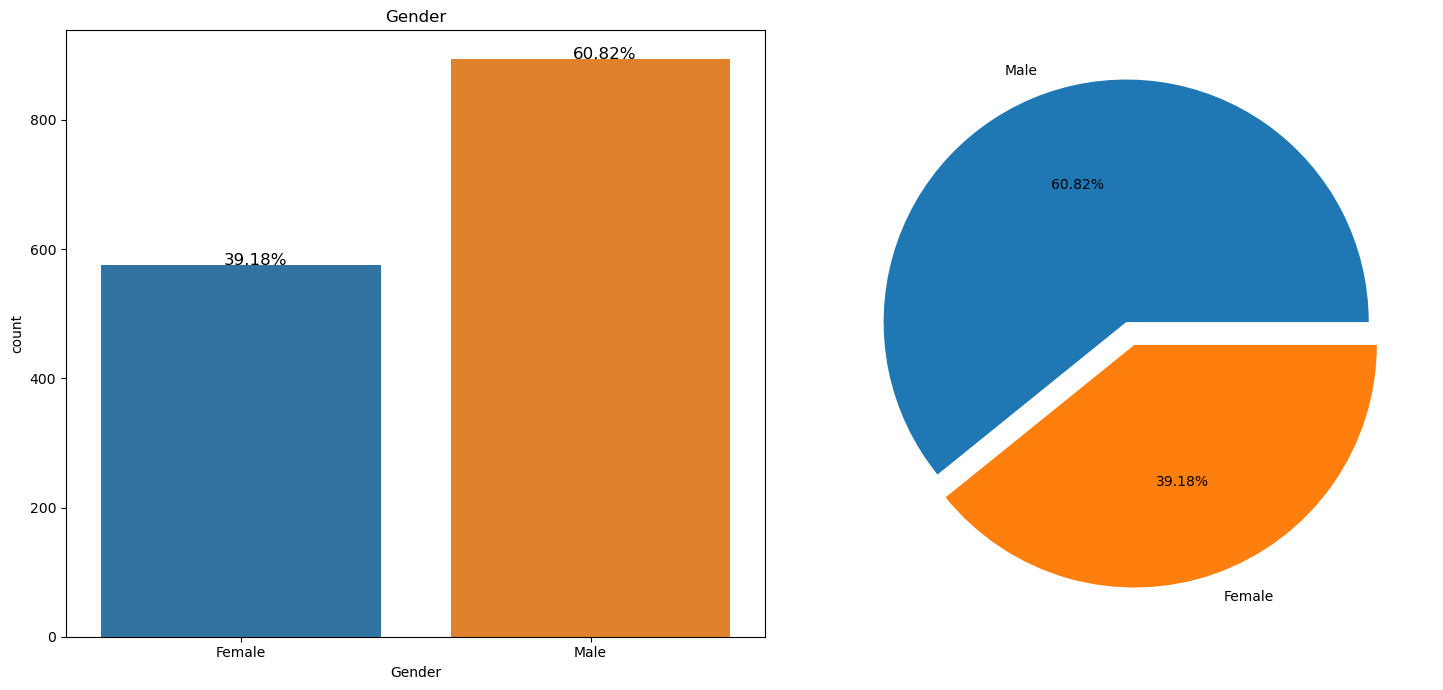

In [23]:
##plotting the reguired graph for better visualisation of data

fig, ax = plt.subplots(1,2,figsize = (15, 7))
ax[0].set_title("Gender")                  
percentage = emp_df["Gender"].value_counts()         
labels = list(emp_df["Gender"].value_counts().index) 

ax = sns.countplot(x = emp_df["Gender"], ax = ax[0])
plt.pie(percentage, autopct= "%0.2f%%", labels = labels, explode = [.05, .05])
total = len(emp_df['Gender'])
for p in ax.patches:
    percentage = '{:.2f}%'.format(100*p.get_height()/total)
    x = p.get_x() + p.get_width()/2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage,(x,y), size = 12)

plt.tight_layout()

In [30]:
## DEPARTMENT

info_of_cat("Department")

Unique value in Department are: ['Sales' 'Research & Development' 'Human Resources' nan]
------------------------------------------------------------
Mode of Department is Research & Development
------------------------------------------------------------
No of missing values in Department is 4


In [31]:
##filling the missing values

Department_m = emp_df['Department'].mode()[0]
print(Department_m)
emp_df["Department"].fillna(Department_m, inplace = True)

Research & Development


In [32]:
##checking if the missing values get filled or not

info_of_cat("Department")

Unique value in Department are: ['Sales' 'Research & Development' 'Human Resources']
------------------------------------------------------------
Mode of Department is Research & Development
------------------------------------------------------------
No of missing values in Department is 0


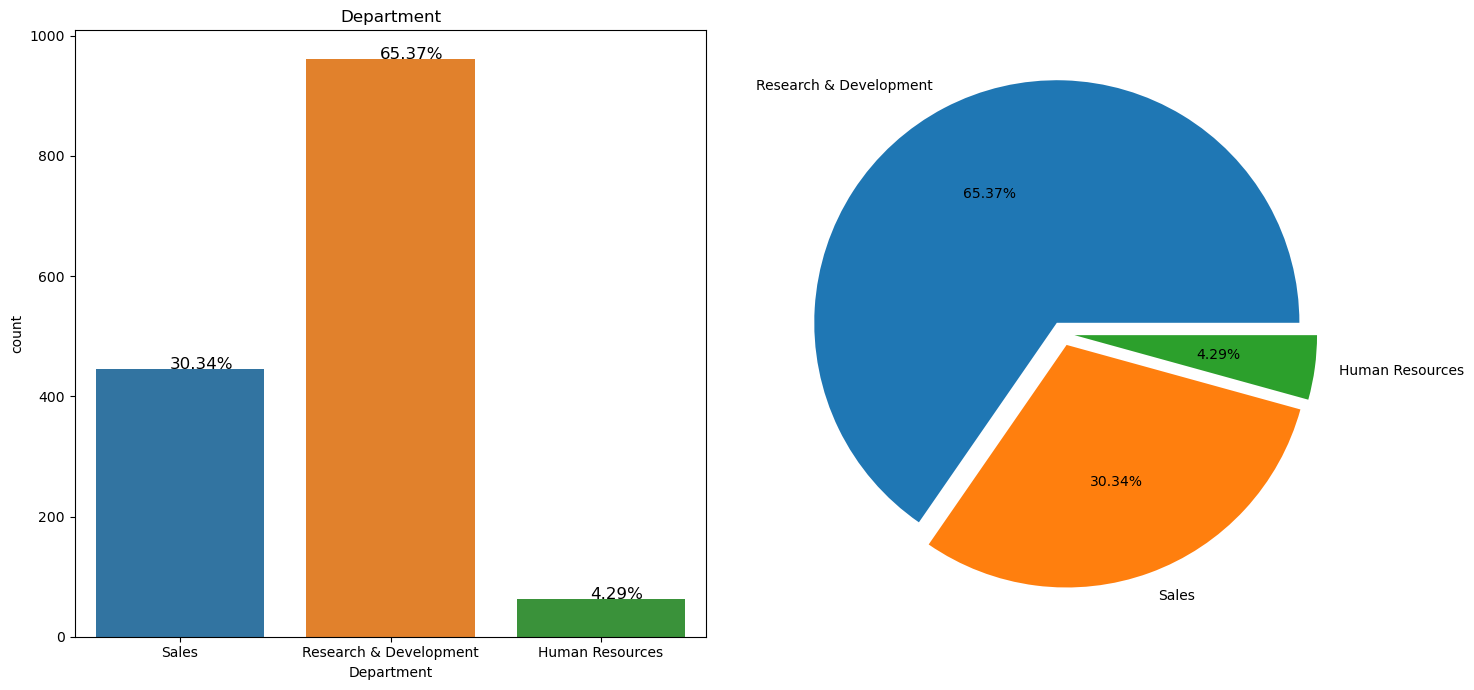

In [33]:
##plotting the reguired graph for better visualisation of data

fig, ax = plt.subplots(1,2,figsize = (15, 7))
ax[0].set_title("Department")                  
percentage = emp_df["Department"].value_counts()         
labels = list(emp_df["Department"].value_counts().index) 

ax = sns.countplot(x = emp_df["Department"], ax = ax[0])
plt.pie(percentage, autopct= "%0.2f%%", labels = labels, explode = [.05, .05, 0.05])
total = len(emp_df['Department'])
for p in ax.patches:
    percentage = '{:.2f}%'.format(100*p.get_height()/total)
    x = p.get_x() + p.get_width()/2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage,(x,y), size = 12)

plt.tight_layout()

In [14]:
##OVER18

info_of_cat("Over18")

Unique value in Over18 are: ['Y' nan]
------------------------------------------------------------
Mode of Over18 is Y
------------------------------------------------------------
No of missing values in Over18 is 54


In [15]:
##filling the missing values

Over18_m = emp_df['Over18'].mode()[0]
print(Over18_m)
emp_df["Over18"].fillna(Over18_m, inplace = True)

Y


In [16]:
##checking if the missing values get filled or not

info_of_cat("Over18")

Unique value in Over18 are: ['Y']
------------------------------------------------------------
Mode of Over18 is Y
------------------------------------------------------------
No of missing values in Over18 is 0


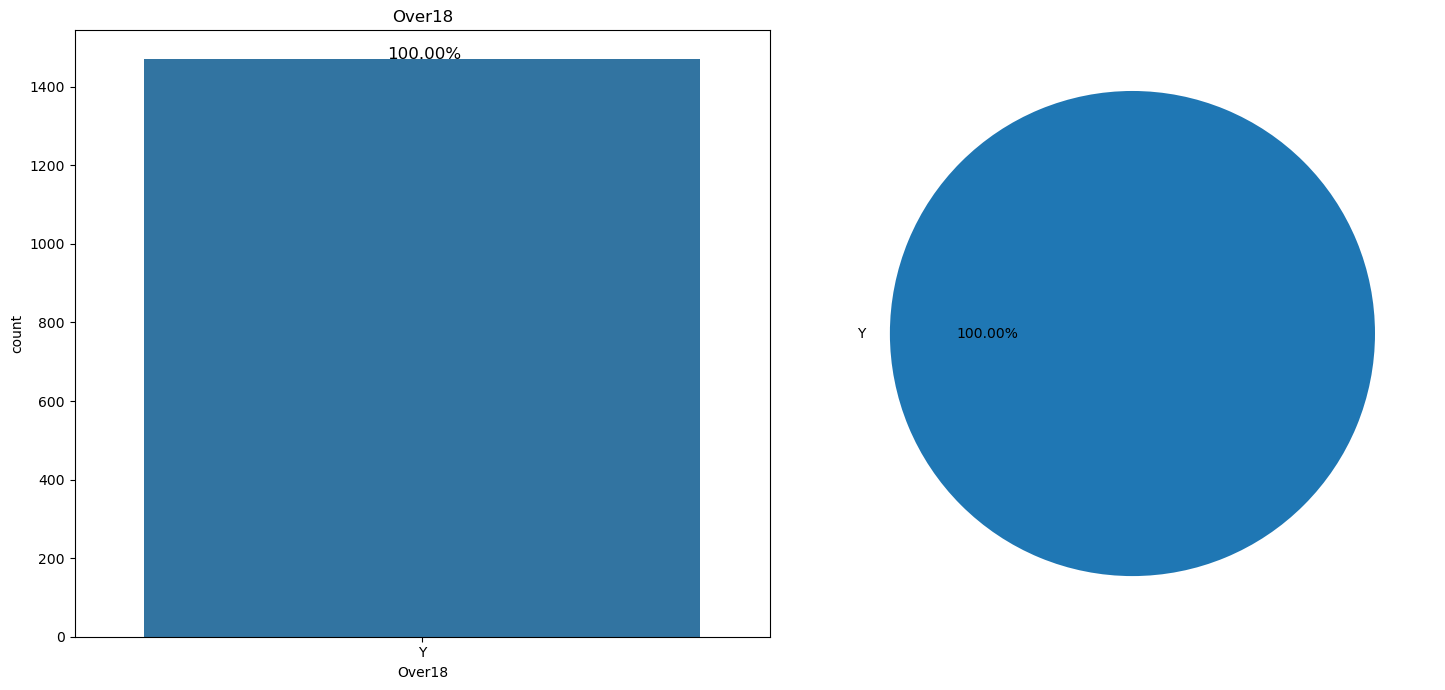

In [17]:
##plotting the reguired graph for better visualisation of data

fig, ax = plt.subplots(1,2,figsize = (15, 7))
ax[0].set_title("Over18")                  
percentage = emp_df["Over18"].value_counts()         
labels = list(emp_df["Over18"].value_counts().index) 

ax = sns.countplot(x = emp_df["Over18"], ax = ax[0])
plt.pie(percentage, autopct= "%0.2f%%", labels = labels)
total = len(emp_df['Over18'])
for p in ax.patches:
    percentage = '{:.2f}%'.format(100*p.get_height()/total)
    x = p.get_x() + p.get_width()/2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage,(x,y), size = 12)

plt.tight_layout()

In [38]:
## OVERTIME

info_of_cat('OverTime')

Unique value in OverTime are: ['Yes' 'No']
------------------------------------------------------------
Mode of OverTime is No
------------------------------------------------------------
No of missing values in OverTime is 0


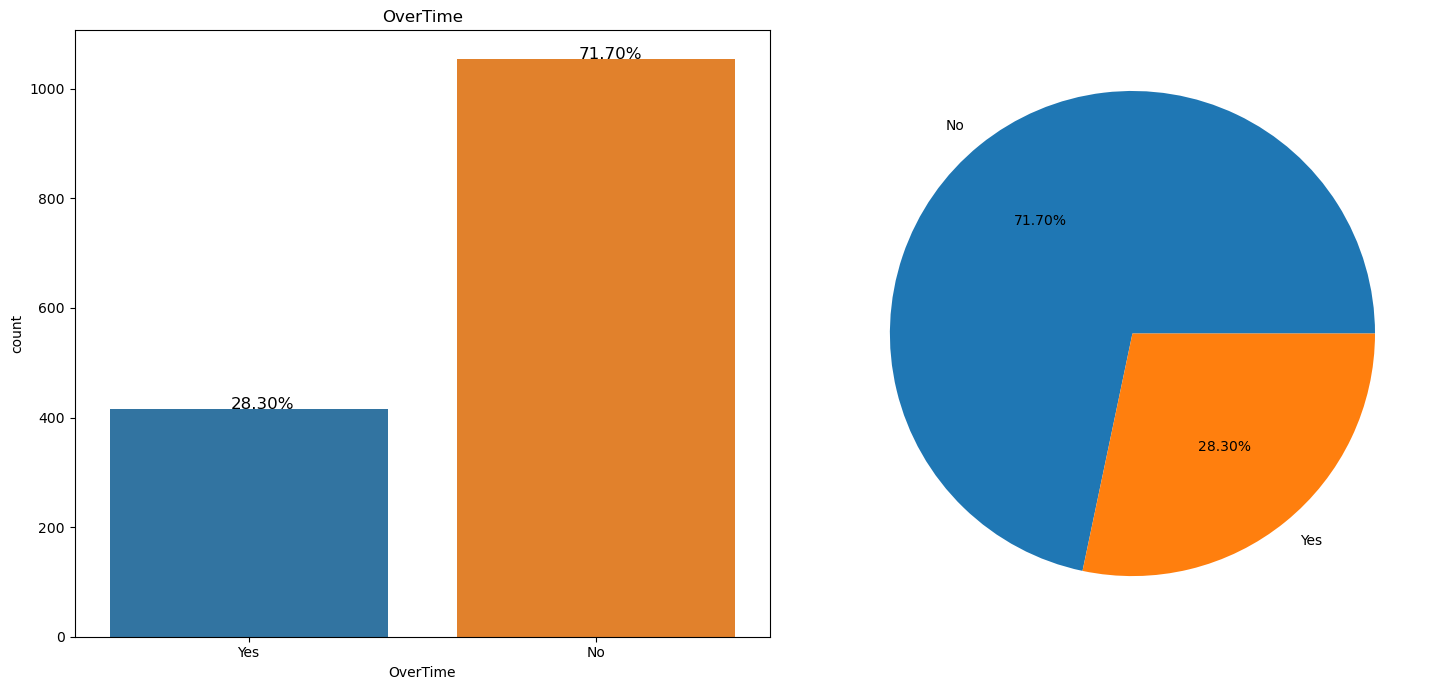

In [39]:
##plotting the reguired graph for better visualisation of data

fig, ax = plt.subplots(1,2,figsize = (15, 7))
ax[0].set_title("OverTime")                  
percentage = emp_df["OverTime"].value_counts()         
labels = list(emp_df["OverTime"].value_counts().index) 

ax = sns.countplot(x = emp_df["OverTime"], ax = ax[0])
plt.pie(percentage, autopct= "%0.2f%%", labels = labels)
total = len(emp_df['OverTime'])
for p in ax.patches:
    percentage = '{:.2f}%'.format(100*p.get_height()/total)
    x = p.get_x() + p.get_width()/2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage,(x,y), size = 12)

plt.tight_layout()

In [19]:
## EnvironmentSatisfaction

info_of_cat('EnvironmentSatisfaction')

Unique value in EnvironmentSatisfaction are: [2 3 4 1]
------------------------------------------------------------
Mode of EnvironmentSatisfaction is 3
------------------------------------------------------------
No of missing values in EnvironmentSatisfaction is 0


In [ ]:
##filling the missing values

Over18_m = emp_df['Over18'].mode()[0]
print(Over18_m)
emp_df["Over18"].fillna(Over18_m, inplace = True)

In [ ]:
##checking if the missing values get filled or not

info_of_cat("EnvironmentSatisfaction")

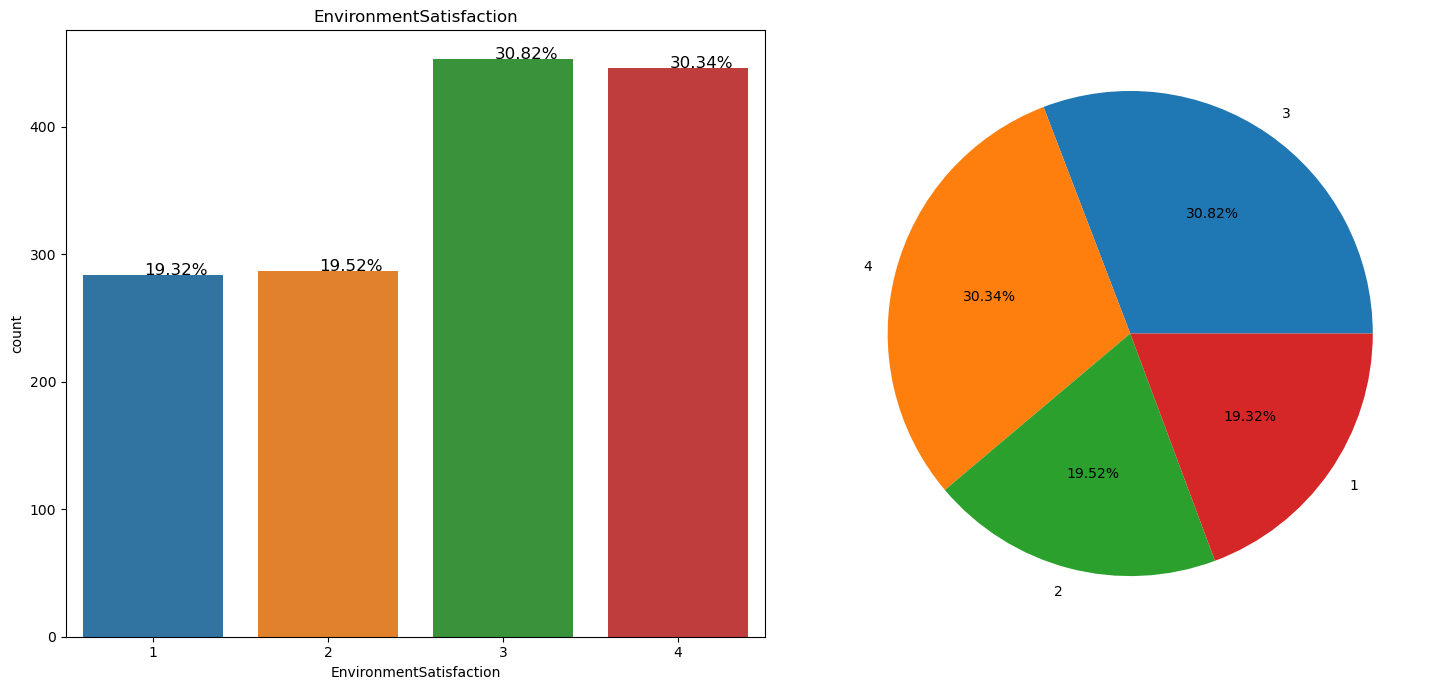

In [20]:
##plotting the reguired graph for better visualisation of data

fig, ax = plt.subplots(1,2,figsize = (15, 7))
ax[0].set_title("EnvironmentSatisfaction")                  
percentage = emp_df["EnvironmentSatisfaction"].value_counts()         
labels = list(emp_df["EnvironmentSatisfaction"].value_counts().index) 

ax = sns.countplot(x = emp_df["EnvironmentSatisfaction"], ax = ax[0])
plt.pie(percentage, autopct= "%0.2f%%", labels = labels)
total = len(emp_df['EnvironmentSatisfaction'])
for p in ax.patches:
    percentage = '{:.2f}%'.format(100*p.get_height()/total)
    x = p.get_x() + p.get_width()/2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage,(x,y), size = 12)

plt.tight_layout()

In [21]:
##PerformanceRating

info_of_cat("PerformanceRating")

Unique value in PerformanceRating are: [3 4]
------------------------------------------------------------
Mode of PerformanceRating is 3
------------------------------------------------------------
No of missing values in PerformanceRating is 0


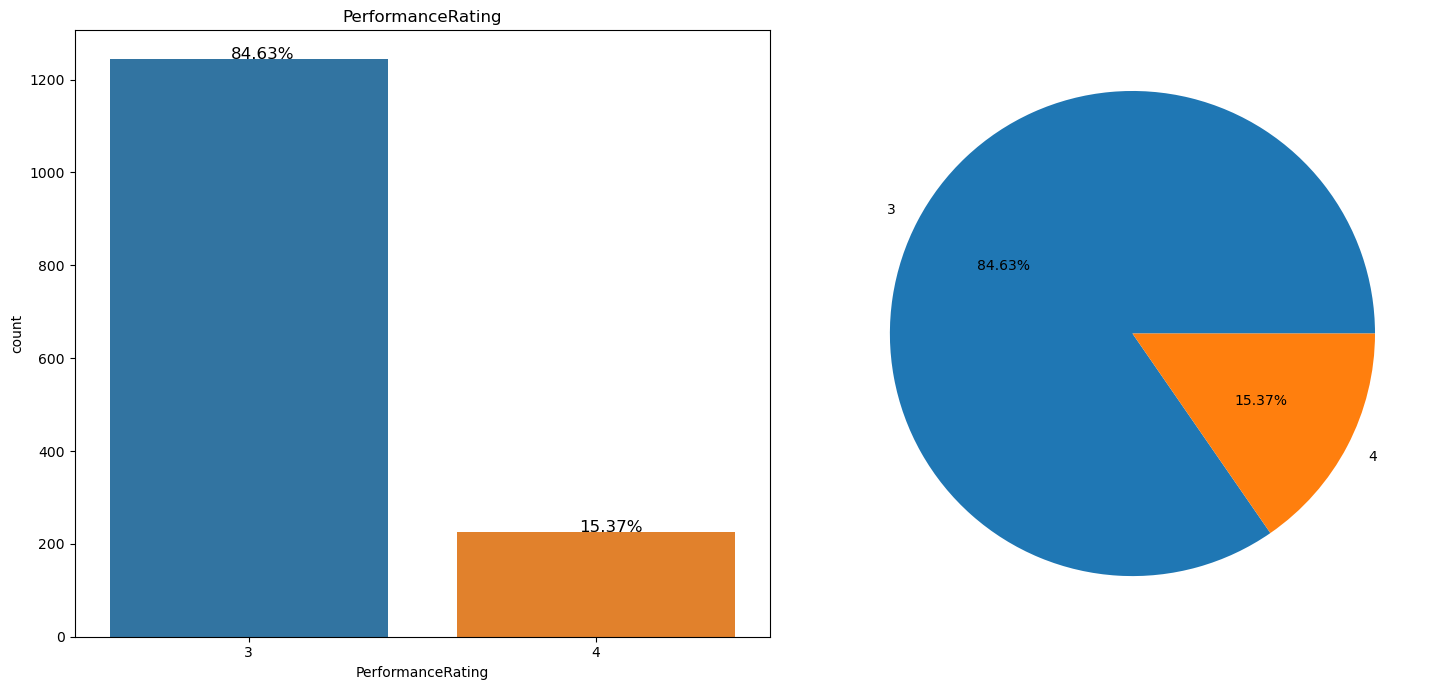

In [22]:
##plotting the reguired graph for better visualisation of data

fig, ax = plt.subplots(1,2,figsize = (15, 7))
ax[0].set_title("PerformanceRating")                  
percentage = emp_df["PerformanceRating"].value_counts()         
labels = list(emp_df["PerformanceRating"].value_counts().index) 

ax = sns.countplot(x = emp_df["PerformanceRating"], ax = ax[0])
plt.pie(percentage, autopct= "%0.2f%%", labels = labels)
total = len(emp_df['PerformanceRating'])
for p in ax.patches:
    percentage = '{:.2f}%'.format(100*p.get_height()/total)
    x = p.get_x() + p.get_width()/2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage,(x,y), size = 12)

plt.tight_layout()

In [23]:
##WorkLifeBalance

info_of_cat("WorkLifeBalance")

Unique value in WorkLifeBalance are: [1 3 2 4]
------------------------------------------------------------
Mode of WorkLifeBalance is 3
------------------------------------------------------------
No of missing values in WorkLifeBalance is 0


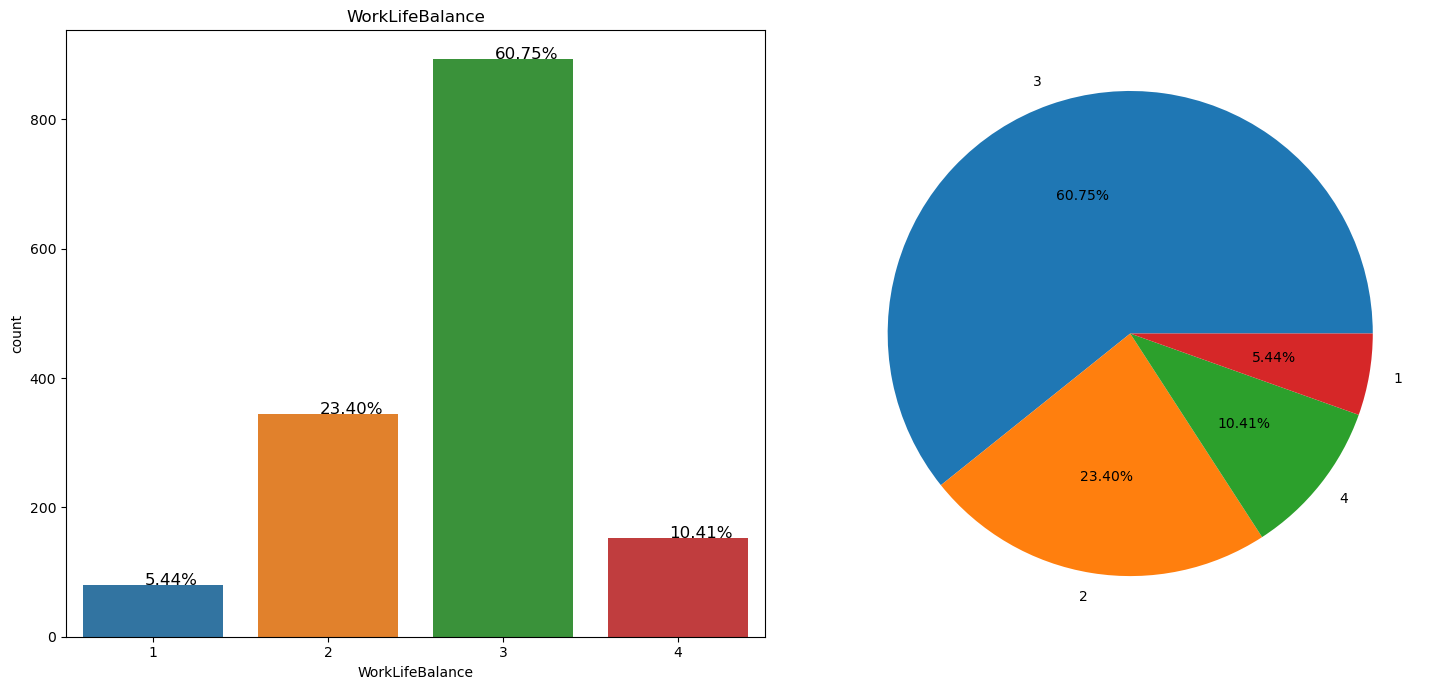

In [29]:
##plotting the reguired graph for better visualisation of data

fig, ax = plt.subplots(1,2,figsize = (15, 7))
ax[0].set_title("WorkLifeBalance")                  
percentage = emp_df["WorkLifeBalance"].value_counts()         
labels = list(emp_df["WorkLifeBalance"].value_counts().index) 

ax = sns.countplot(x = emp_df["WorkLifeBalance"], ax = ax[0])
plt.pie(percentage, autopct= "%0.2f%%", labels = labels)
total = len(emp_df['WorkLifeBalance'])
for p in ax.patches:
    percentage = '{:.2f}%'.format(100*p.get_height()/total)
    x = p.get_x() + p.get_width()/2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage,(x,y), size = 12)

plt.tight_layout()

In [25]:
## DISTANCE FROM HOME

info_of_cat('DistanceFromHome')

Unique value in DistanceFromHome are: [ 1  8  2  3 24 23 27 16 15 26 19 21  5 11  9  7  6 10  4 25 12 18 29 22
 14 20 28 17 13]
------------------------------------------------------------
Mode of DistanceFromHome is 2
------------------------------------------------------------
No of missing values in DistanceFromHome is 0


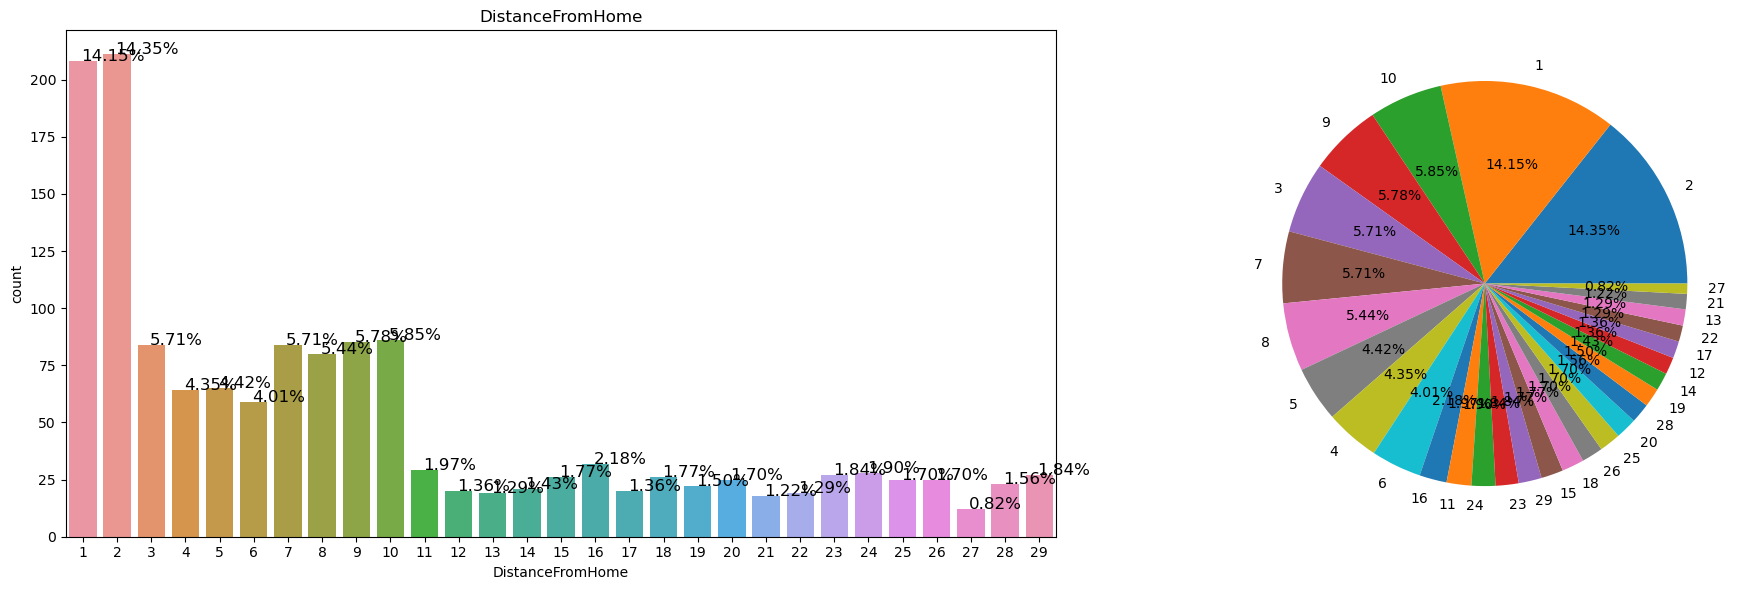

In [28]:
##plotting the reguired graph for better visualisation of data

fig, ax = plt.subplots(1,2,figsize = (20, 6))
ax[0].set_title("DistanceFromHome")                  
percentage = emp_df["DistanceFromHome"].value_counts()         
labels = list(emp_df["DistanceFromHome"].value_counts().index) 

ax = sns.countplot(x = emp_df["DistanceFromHome"], ax = ax[0])
plt.pie(percentage, autopct= "%0.2f%%", labels = labels)
total = len(emp_df['DistanceFromHome'])
for p in ax.patches:
    percentage = '{:.2f}%'.format(100*p.get_height()/total)
    x = p.get_x() + p.get_width()/2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage,(x,y), size = 12)

plt.tight_layout()

In [30]:
## YEARS SINCE LAST PROMOTION

info_of_cat('YearsSinceLastPromotion')

Unique value in YearsSinceLastPromotion are: [ 0  1  3  2  7  4  8  6  5 15  9 13 12 10 11 14]
------------------------------------------------------------
Mode of YearsSinceLastPromotion is 0
------------------------------------------------------------
No of missing values in YearsSinceLastPromotion is 0


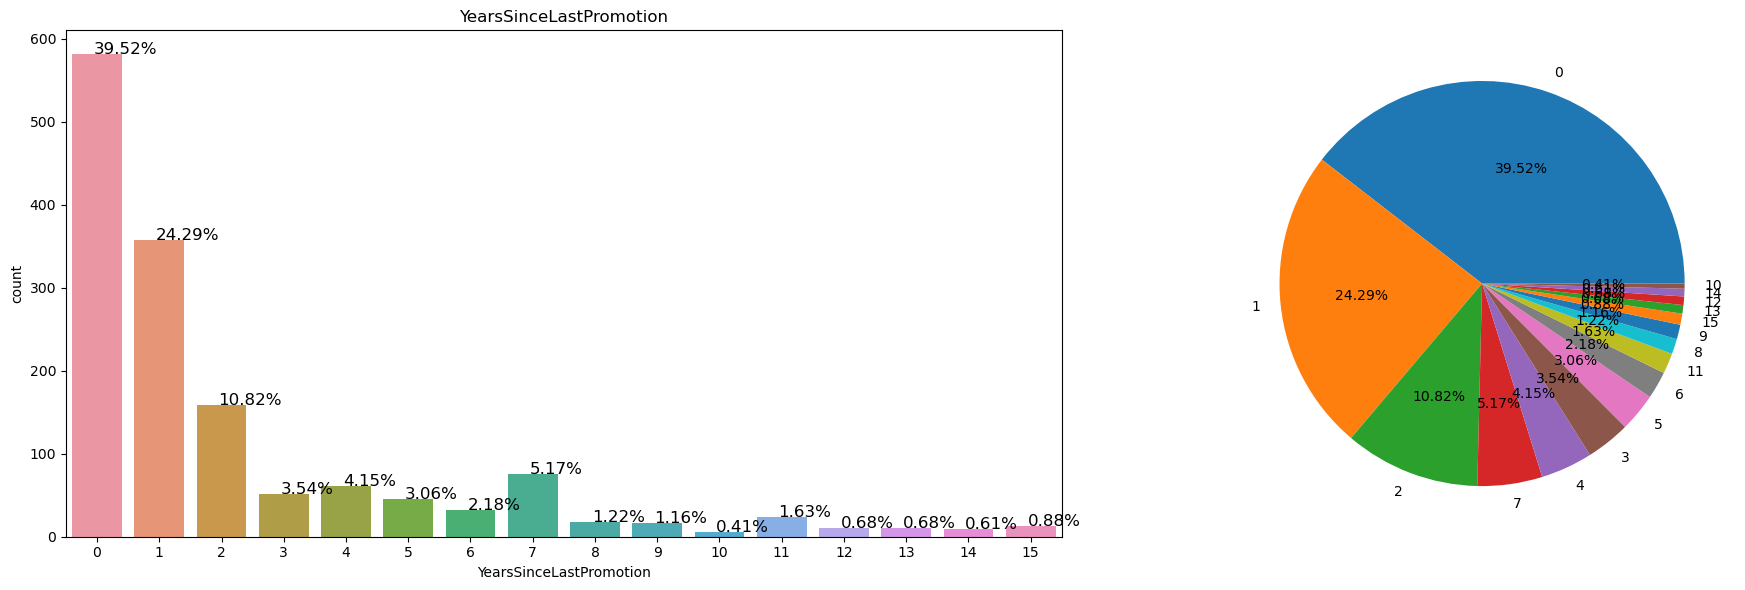

In [31]:
##plotting the reguired graph for better visualisation of data

fig, ax = plt.subplots(1,2,figsize = (20, 6))
ax[0].set_title("YearsSinceLastPromotion")                  
percentage = emp_df["YearsSinceLastPromotion"].value_counts()         
labels = list(emp_df["YearsSinceLastPromotion"].value_counts().index) 

ax = sns.countplot(x = emp_df["YearsSinceLastPromotion"], ax = ax[0])
plt.pie(percentage, autopct= "%0.2f%%", labels = labels)
total = len(emp_df['YearsSinceLastPromotion'])
for p in ax.patches:
    percentage = '{:.2f}%'.format(100*p.get_height()/total)
    x = p.get_x() + p.get_width()/2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage,(x,y), size = 12)

plt.tight_layout()

In [32]:
## NUMBER OF COMPANIES WORKED

info_of_cat('NumCompaniesWorked')

Unique value in NumCompaniesWorked are: [8 1 6 9 0 4 5 2 7 3]
------------------------------------------------------------
Mode of NumCompaniesWorked is 1
------------------------------------------------------------
No of missing values in NumCompaniesWorked is 0


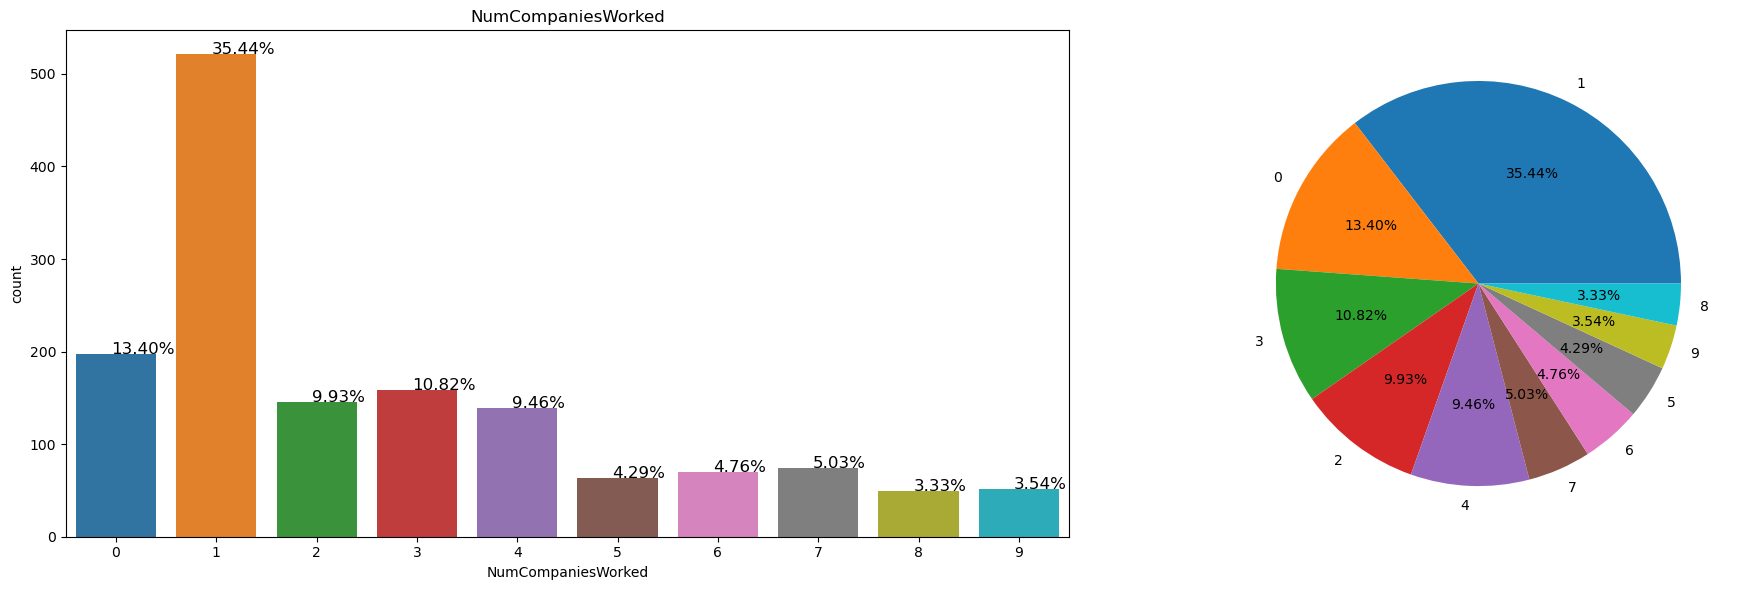

In [36]:
##plotting the reguired graph for better visualisation of data

fig, ax = plt.subplots(1,2,figsize = (20, 6))
ax[0].set_title("NumCompaniesWorked")                  
percentage = emp_df["NumCompaniesWorked"].value_counts()         
labels = list(emp_df["NumCompaniesWorked"].value_counts().index) 

ax = sns.countplot(x = emp_df["NumCompaniesWorked"], ax = ax[0])
plt.pie(percentage, autopct= "%0.2f%%", labels = labels)
total = len(emp_df['NumCompaniesWorked'])
for p in ax.patches:
    percentage = '{:.2f}%'.format(100*p.get_height()/total)
    x = p.get_x() + p.get_width()/2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage,(x,y), size = 12)

plt.tight_layout()

In [34]:
## YEARS IN CURRENT ROLE

info_of_cat('YearsInCurrentRole')

Unique value in YearsInCurrentRole are: [ 4  7  0  2  5  9  8  3  6 13  1 15 14 16 11 10 12 18 17]
------------------------------------------------------------
Mode of YearsInCurrentRole is 2
------------------------------------------------------------
No of missing values in YearsInCurrentRole is 0


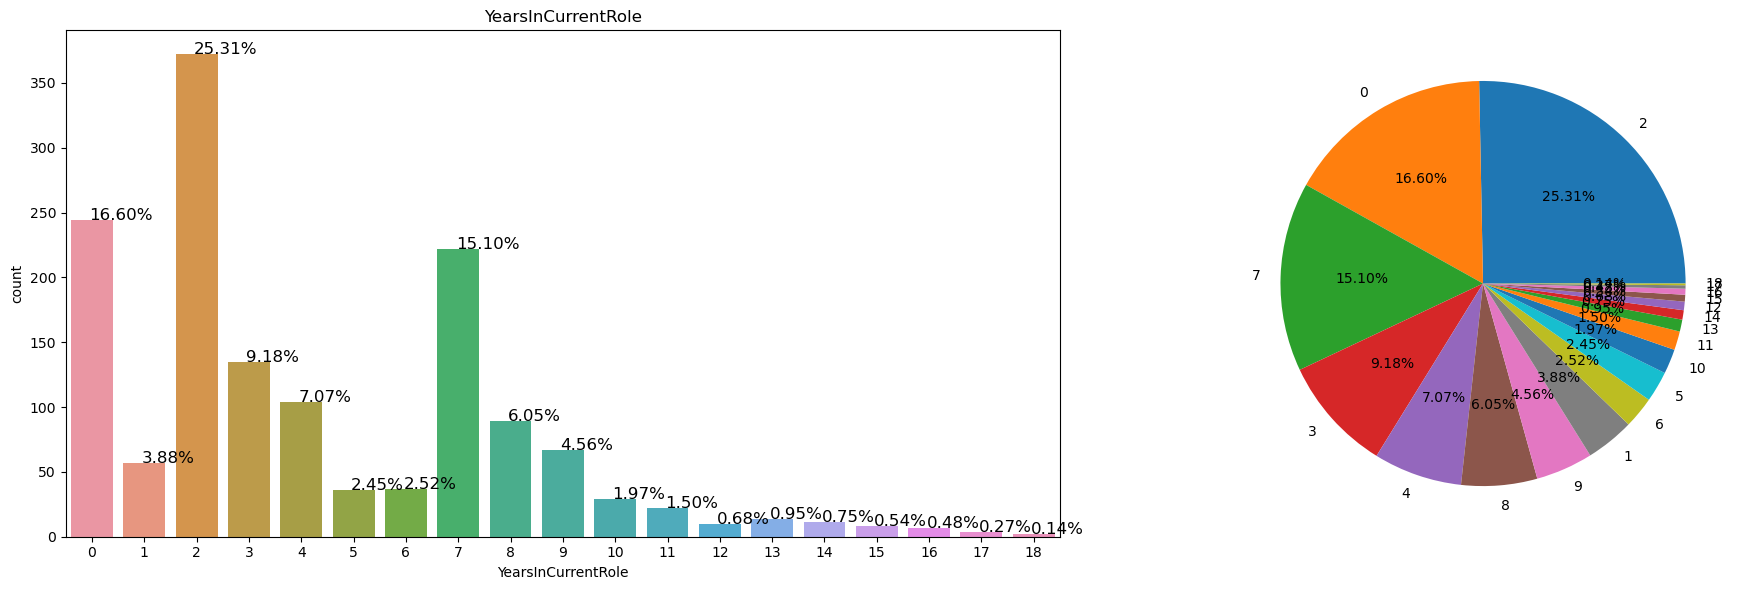

In [35]:
##plotting the reguired graph for better visualisation of data

fig, ax = plt.subplots(1,2,figsize = (20, 6))
ax[0].set_title("YearsInCurrentRole")                  
percentage = emp_df["YearsInCurrentRole"].value_counts()         
labels = list(emp_df["YearsInCurrentRole"].value_counts().index) 

ax = sns.countplot(x = emp_df["YearsInCurrentRole"], ax = ax[0])
plt.pie(percentage, autopct= "%0.2f%%", labels = labels)
total = len(emp_df['YearsInCurrentRole'])
for p in ax.patches:
    percentage = '{:.2f}%'.format(100*p.get_height()/total)
    x = p.get_x() + p.get_width()/2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage,(x,y), size = 12)

plt.tight_layout()

In [37]:
## TRAINING TIMES LAST YEAR

info_of_cat('TrainingTimesLastYear')

Unique value in TrainingTimesLastYear are: [0 3 2 5 1 4 6]
------------------------------------------------------------
Mode of TrainingTimesLastYear is 2
------------------------------------------------------------
No of missing values in TrainingTimesLastYear is 0


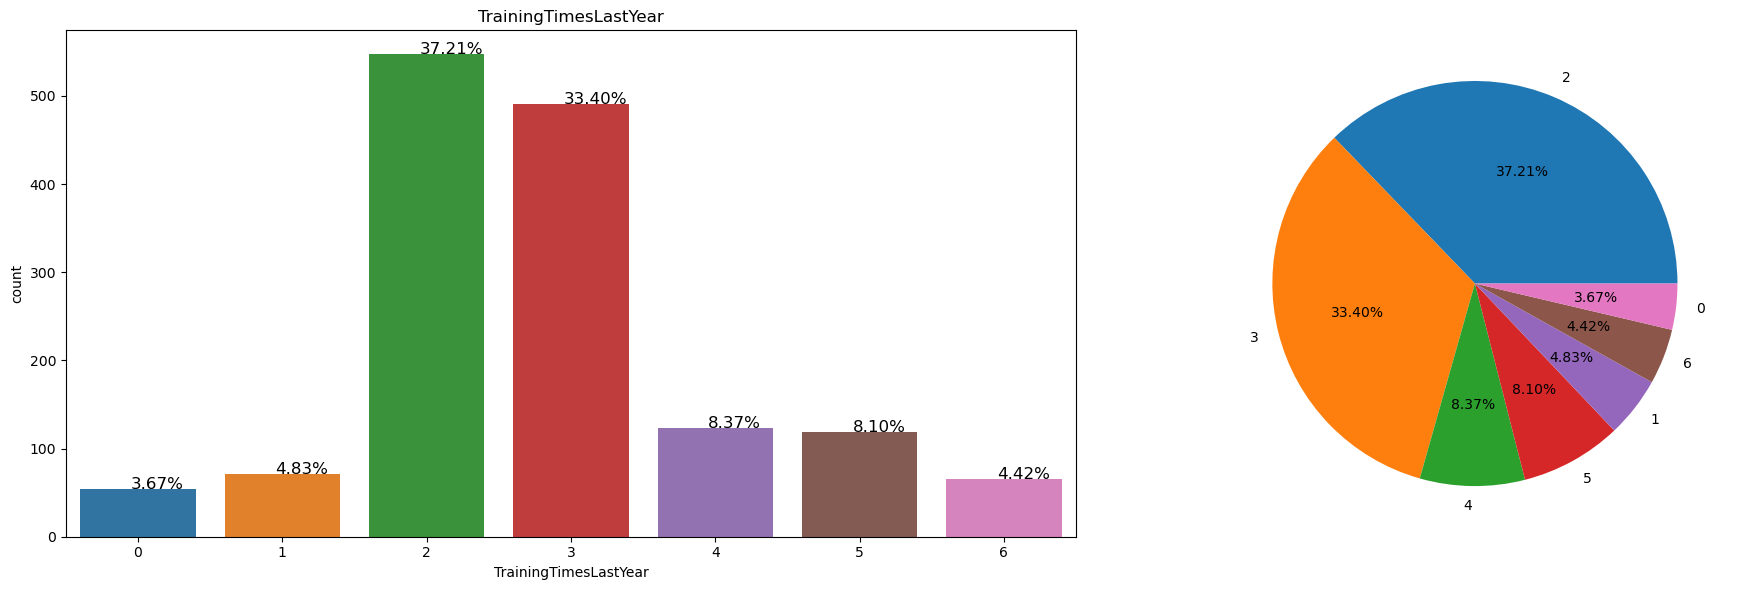

In [38]:
##plotting the reguired graph for better visualisation of data

fig, ax = plt.subplots(1,2,figsize = (20, 6))
ax[0].set_title("TrainingTimesLastYear")                  
percentage = emp_df["TrainingTimesLastYear"].value_counts()         
labels = list(emp_df["TrainingTimesLastYear"].value_counts().index) 

ax = sns.countplot(x = emp_df["TrainingTimesLastYear"], ax = ax[0])
plt.pie(percentage, autopct= "%0.2f%%", labels = labels)
total = len(emp_df['TrainingTimesLastYear'])
for p in ax.patches:
    percentage = '{:.2f}%'.format(100*p.get_height()/total)
    x = p.get_x() + p.get_width()/2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage,(x,y), size = 12)

plt.tight_layout()

In [39]:
## JOB SATISFACTION

info_of_cat('JobSatisfaction')

Unique value in JobSatisfaction are: [4 2 3 1]
------------------------------------------------------------
Mode of JobSatisfaction is 4
------------------------------------------------------------
No of missing values in JobSatisfaction is 0


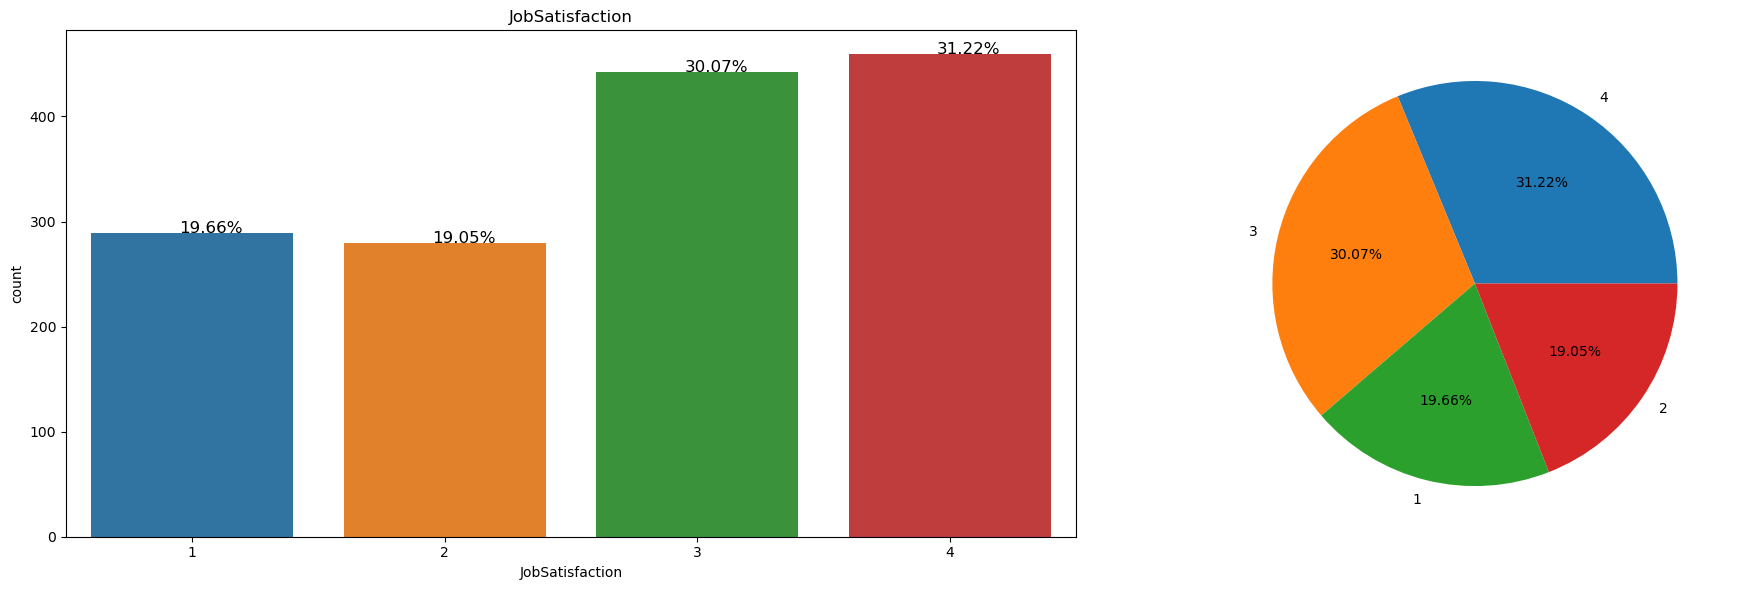

In [40]:
##plotting the reguired graph for better visualisation of data

fig, ax = plt.subplots(1,2,figsize = (20, 6))
ax[0].set_title("JobSatisfaction")                  
percentage = emp_df["JobSatisfaction"].value_counts()         
labels = list(emp_df["JobSatisfaction"].value_counts().index) 

ax = sns.countplot(x = emp_df["JobSatisfaction"], ax = ax[0])
plt.pie(percentage, autopct= "%0.2f%%", labels = labels)
total = len(emp_df['JobSatisfaction'])
for p in ax.patches:
    percentage = '{:.2f}%'.format(100*p.get_height()/total)
    x = p.get_x() + p.get_width()/2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage,(x,y), size = 12)

plt.tight_layout()

In [41]:
## JOB INVOLVEMENT

info_of_cat('JobInvolvement')

Unique value in JobInvolvement are: [3 2 4 1]
------------------------------------------------------------
Mode of JobInvolvement is 3
------------------------------------------------------------
No of missing values in JobInvolvement is 0


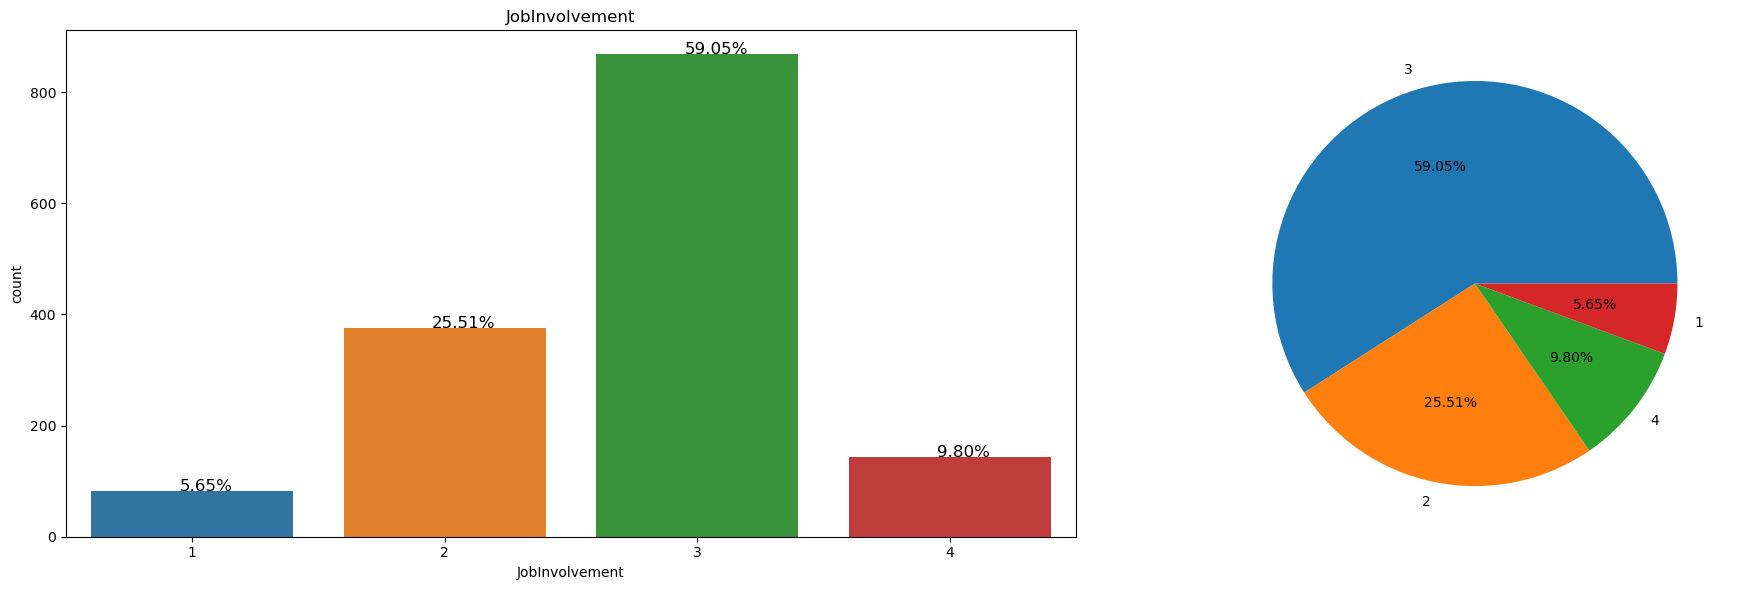

In [42]:
##plotting the reguired graph for better visualisation of data

fig, ax = plt.subplots(1,2,figsize = (20, 6))
ax[0].set_title("JobInvolvement")                  
percentage = emp_df["JobInvolvement"].value_counts()         
labels = list(emp_df["JobInvolvement"].value_counts().index) 

ax = sns.countplot(x = emp_df["JobInvolvement"], ax = ax[0])
plt.pie(percentage, autopct= "%0.2f%%", labels = labels)
total = len(emp_df['JobInvolvement'])
for p in ax.patches:
    percentage = '{:.2f}%'.format(100*p.get_height()/total)
    x = p.get_x() + p.get_width()/2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage,(x,y), size = 12)

plt.tight_layout()

In [43]:
## RELATIONSHIP SATISFACTION

info_of_cat('RelationshipSatisfaction')

Unique value in RelationshipSatisfaction are: [1 4 2 3]
------------------------------------------------------------
Mode of RelationshipSatisfaction is 3
------------------------------------------------------------
No of missing values in RelationshipSatisfaction is 0


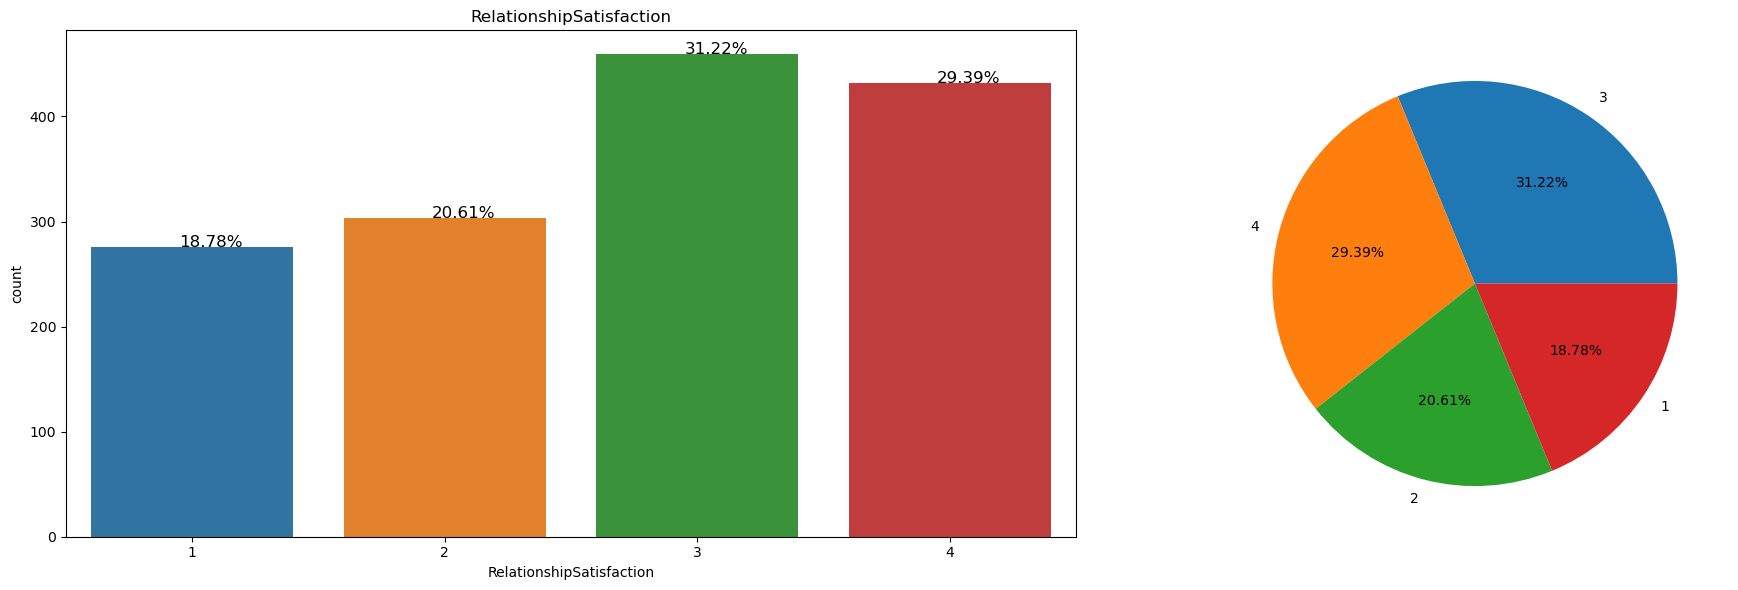

In [44]:
##plotting the reguired graph for better visualisation of data

fig, ax = plt.subplots(1,2,figsize = (20, 6))
ax[0].set_title("RelationshipSatisfaction")                  
percentage = emp_df["RelationshipSatisfaction"].value_counts()         
labels = list(emp_df["RelationshipSatisfaction"].value_counts().index) 

ax = sns.countplot(x = emp_df["RelationshipSatisfaction"], ax = ax[0])
plt.pie(percentage, autopct= "%0.2f%%", labels = labels)
total = len(emp_df['RelationshipSatisfaction'])
for p in ax.patches:
    percentage = '{:.2f}%'.format(100*p.get_height()/total)
    x = p.get_x() + p.get_width()/2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage,(x,y), size = 12)

plt.tight_layout()

In [45]:
## YEARS WITH CURRENT MANAGER

info_of_cat('YearsWithCurrManager')

Unique value in YearsWithCurrManager are: [ 5  7  0  2  6  8  3 11 17  1  4 12  9 10 15 13 16 14]
------------------------------------------------------------
Mode of YearsWithCurrManager is 2
------------------------------------------------------------
No of missing values in YearsWithCurrManager is 0


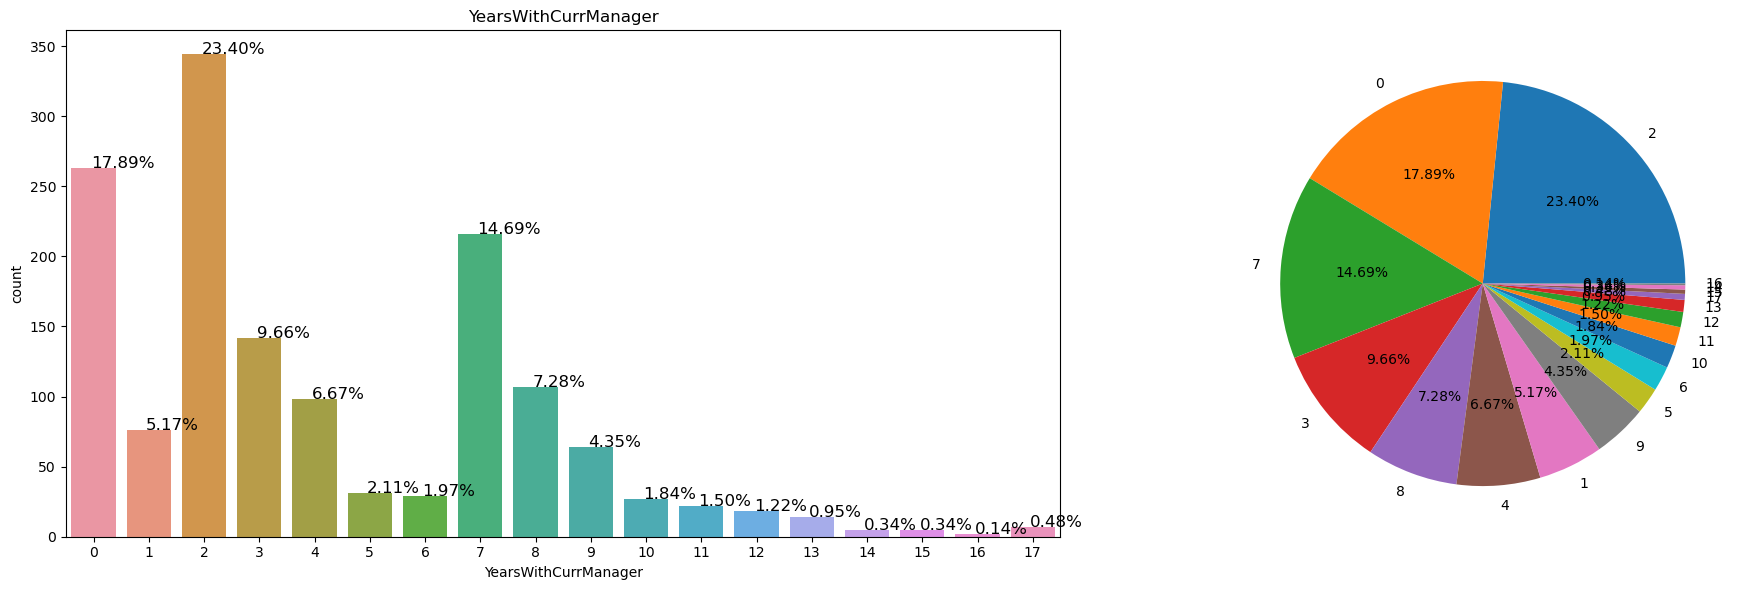

In [46]:
##plotting the reguired graph for better visualisation of data

fig, ax = plt.subplots(1,2,figsize = (20, 6))
ax[0].set_title("YearsWithCurrManager")                  
percentage = emp_df["YearsWithCurrManager"].value_counts()         
labels = list(emp_df["YearsWithCurrManager"].value_counts().index) 

ax = sns.countplot(x = emp_df["YearsWithCurrManager"], ax = ax[0])
plt.pie(percentage, autopct= "%0.2f%%", labels = labels)
total = len(emp_df['YearsWithCurrManager'])
for p in ax.patches:
    percentage = '{:.2f}%'.format(100*p.get_height()/total)
    x = p.get_x() + p.get_width()/2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage,(x,y), size = 12)

plt.tight_layout()

TASK 5

In [40]:
##defining the function for the descriptive analysis of numercal dataset

def info_of_numerical(col):
    print(f"The mean of the {col} is {emp_df[col].mean()}")
    print("-"*60)
    print(f"The median of the {col} is {emp_df[col].median()}")
    print("-"*60)
    print(f"The mode of the {col} is {emp_df[col].mode()[0]}")
    print("-"*60)
    print(f"The standard deviation of the {col} is {emp_df[col].std()}")
    print("-"*60)
    print(f"Number of missing values in the {col} is {emp_df[col].isnull().sum()}")

In [41]:
## TOTAL WORKING YEARS

info_of_numerical('TotalWorkingYears')

The mean of the TotalWorkingYears is 11.279591836734694
------------------------------------------------------------
The median of the TotalWorkingYears is 10.0
------------------------------------------------------------
The mode of the TotalWorkingYears is 10
------------------------------------------------------------
The standard deviation of the TotalWorkingYears is 7.780781675515004
------------------------------------------------------------
Number of missing values in the TotalWorkingYears is 0


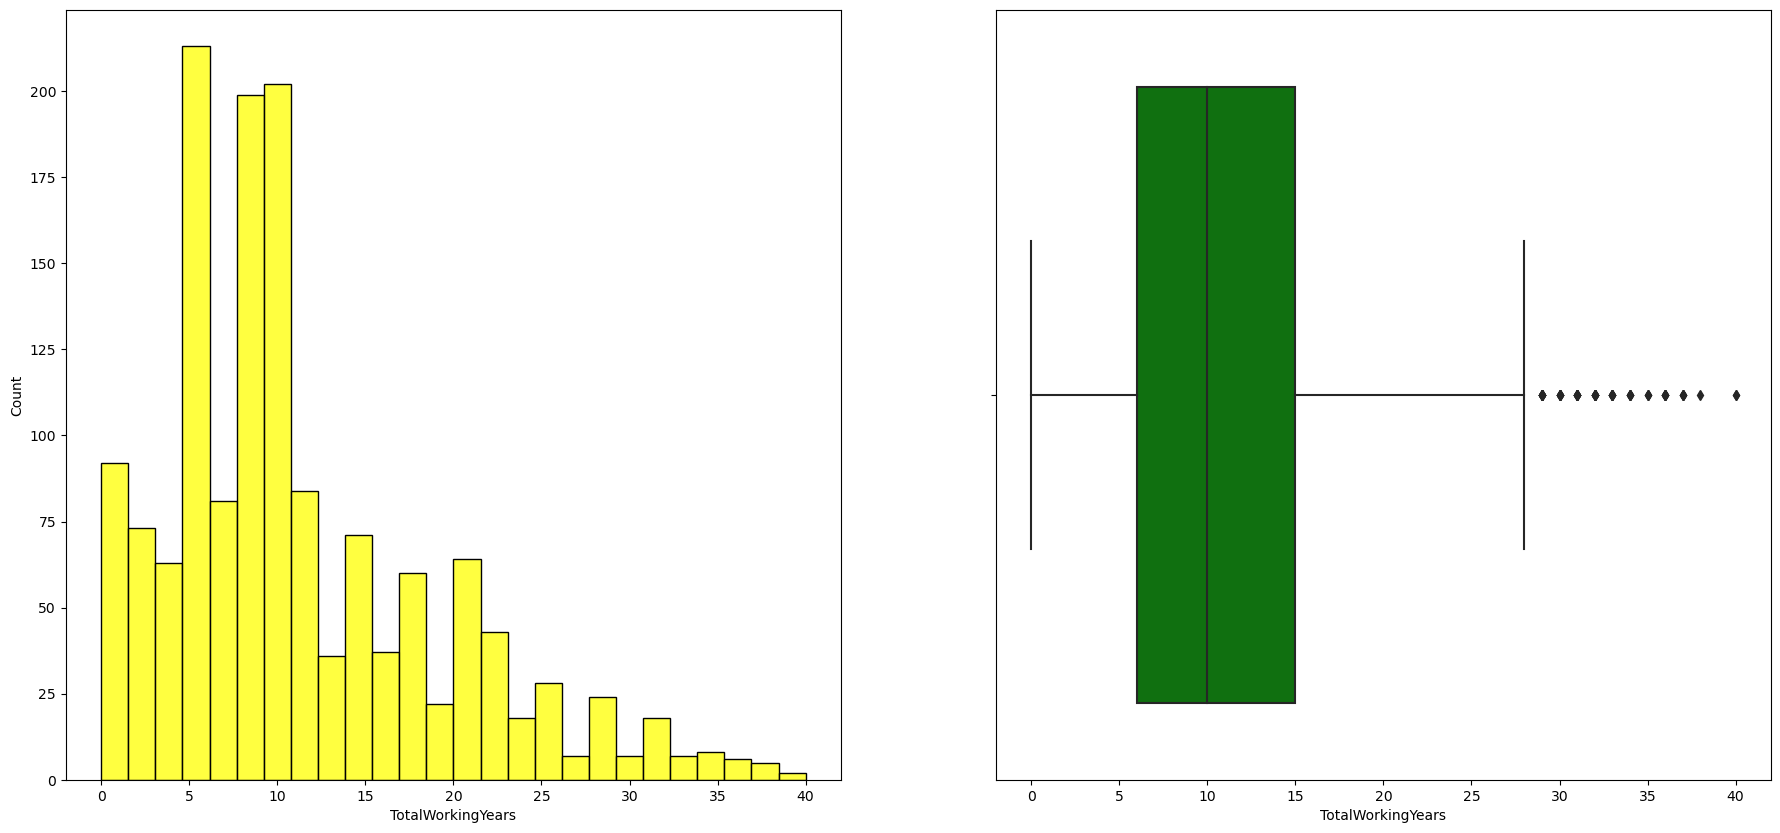

In [42]:
##plotting the graph to represent the skewness of data

fig, ax = plt.subplots (1, 2, figsize = (22, 10))
sns.histplot(x = emp_df['TotalWorkingYears'], ax = ax[0], color = 'yellow')
sns.boxplot(x = emp_df['TotalWorkingYears'], ax = ax[1], color = 'green')
plt.show()

In [47]:
## HOURLY RATE

info_of_numerical('HourlyRate')

The mean of the HourlyRate is 65.89115646258503
------------------------------------------------------------
The median of the HourlyRate is 66.0
------------------------------------------------------------
The mode of the HourlyRate is 66
------------------------------------------------------------
The standard deviation of the HourlyRate is 20.329427593996158
------------------------------------------------------------
Number of missing values in the HourlyRate is 0


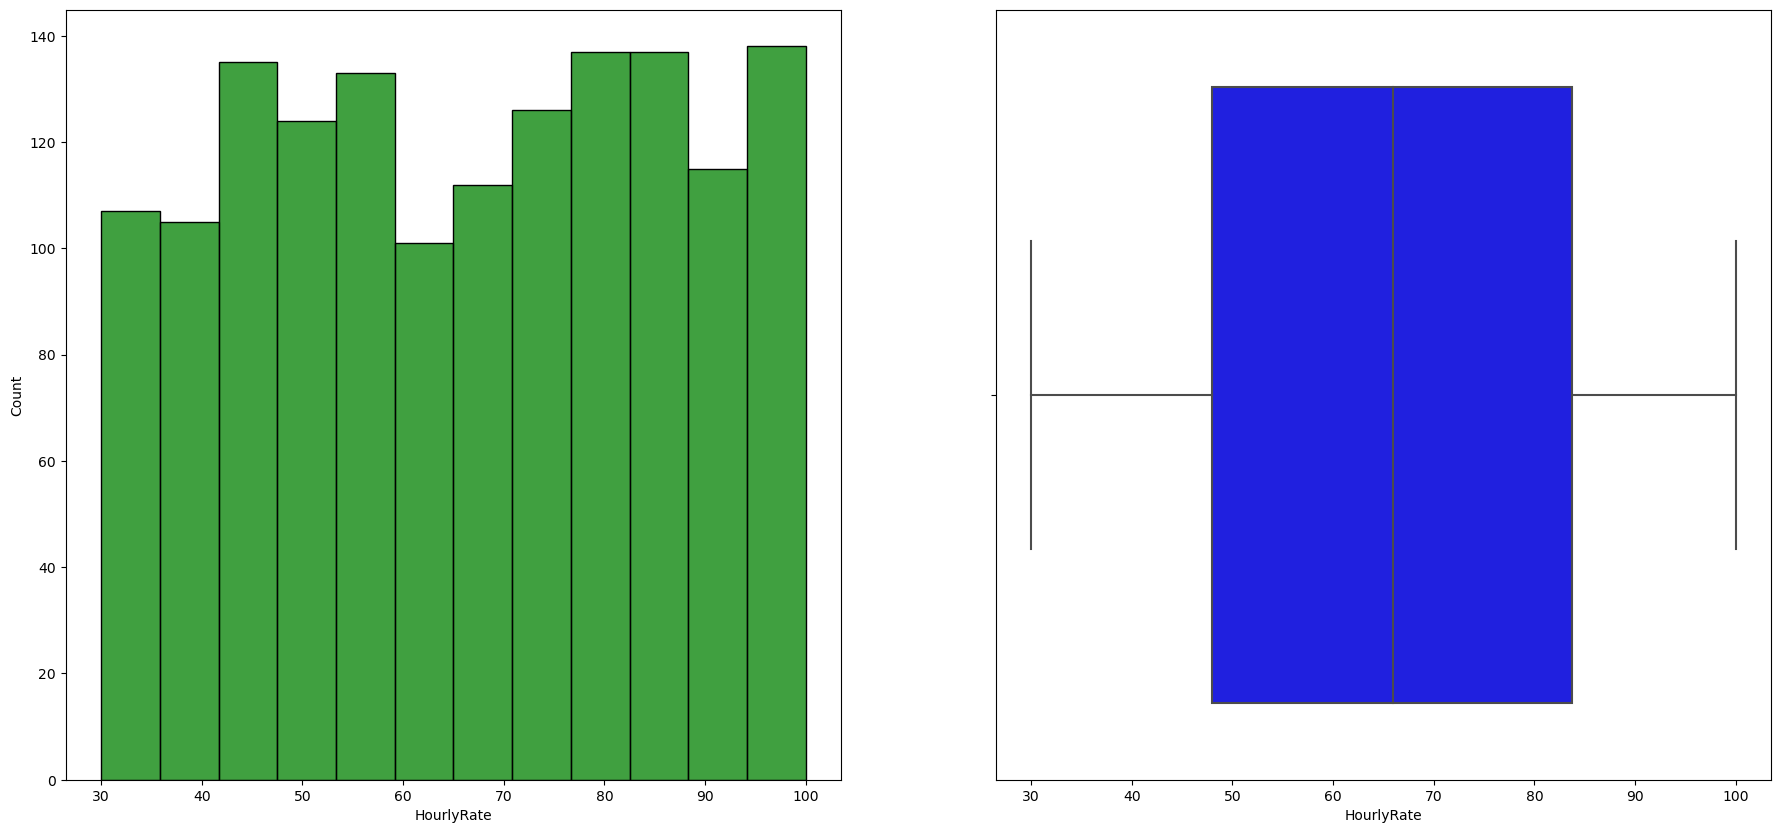

In [48]:
##plotting the graph to represent the skewness of data

fig, ax = plt.subplots (1, 2, figsize = (22, 10))
sns.histplot(x = emp_df['HourlyRate'], ax = ax[0], color = 'green')
sns.boxplot(x = emp_df['HourlyRate'], ax = ax[1], color = 'blue')
plt.show()

In [51]:
## MONTHLY INCOME

info_of_numerical('MonthlyIncome')

The mean of the MonthlyIncome is 6502.931292517007
------------------------------------------------------------
The median of the MonthlyIncome is 4919.0
------------------------------------------------------------
The mode of the MonthlyIncome is 2342
------------------------------------------------------------
The standard deviation of the MonthlyIncome is 4707.956783097995
------------------------------------------------------------
Number of missing values in the MonthlyIncome is 0


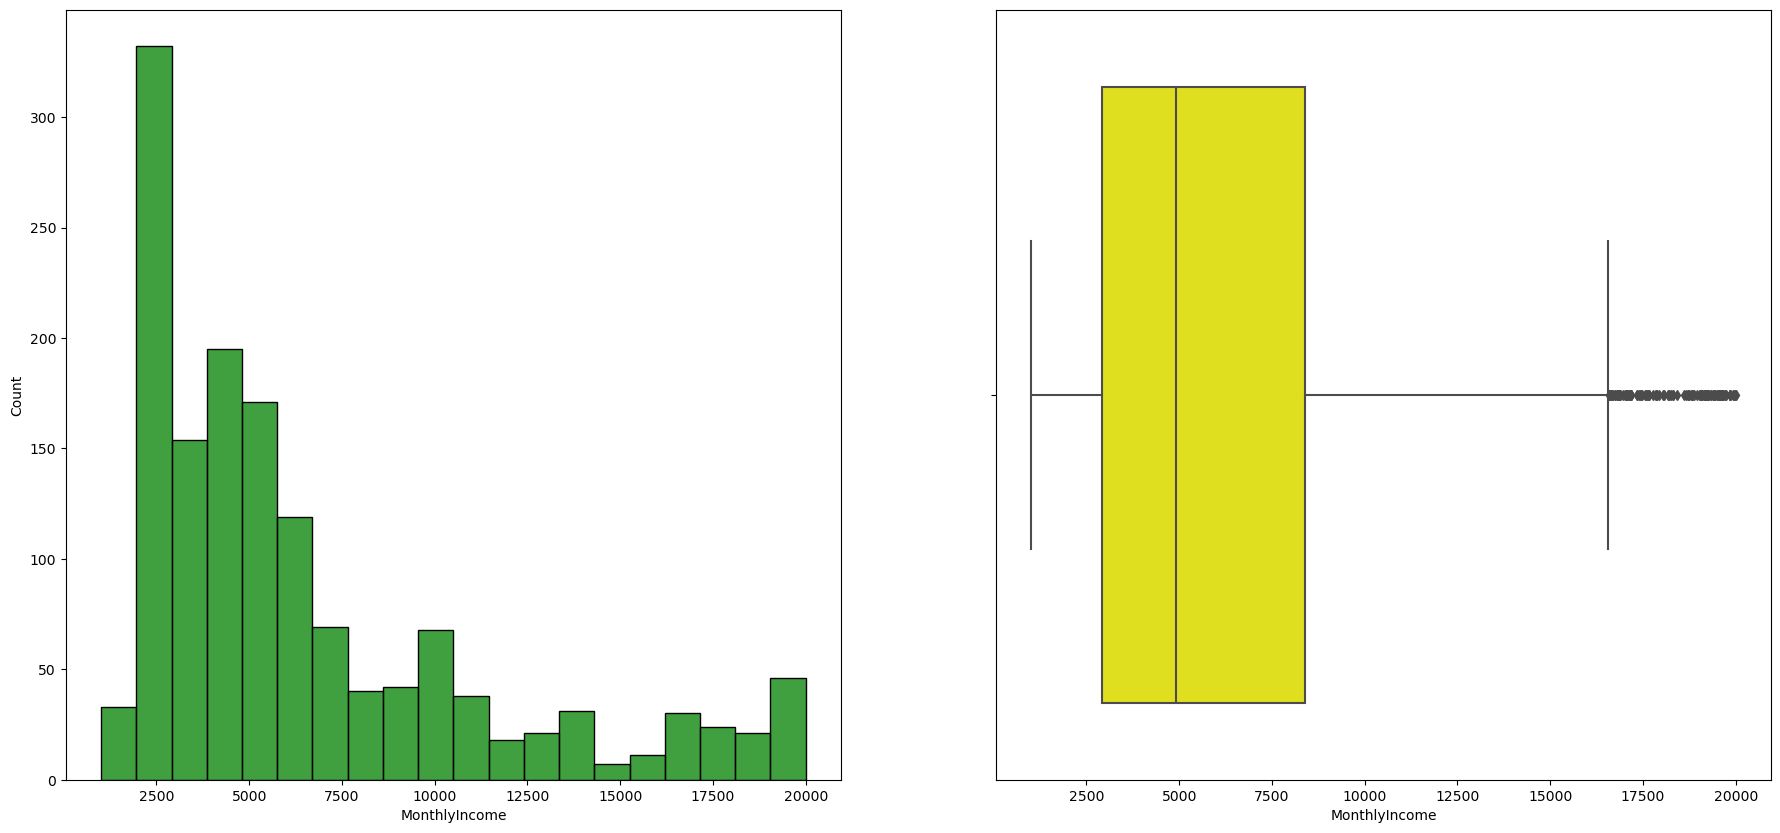

In [52]:
##plotting the graph to represent the skewness of data

fig, ax = plt.subplots (1, 2, figsize = (22, 10))
sns.histplot(x = emp_df['MonthlyIncome'], ax = ax[0], color = 'green')
sns.boxplot(x = emp_df['MonthlyIncome'], ax = ax[1], color = 'yellow')
plt.show()

In [53]:
## YEARS AT COMPANY

info_of_numerical('YearsAtCompany')

The mean of the YearsAtCompany is 7.0081632653061225
------------------------------------------------------------
The median of the YearsAtCompany is 5.0
------------------------------------------------------------
The mode of the YearsAtCompany is 5
------------------------------------------------------------
The standard deviation of the YearsAtCompany is 6.126525152403566
------------------------------------------------------------
Number of missing values in the YearsAtCompany is 0


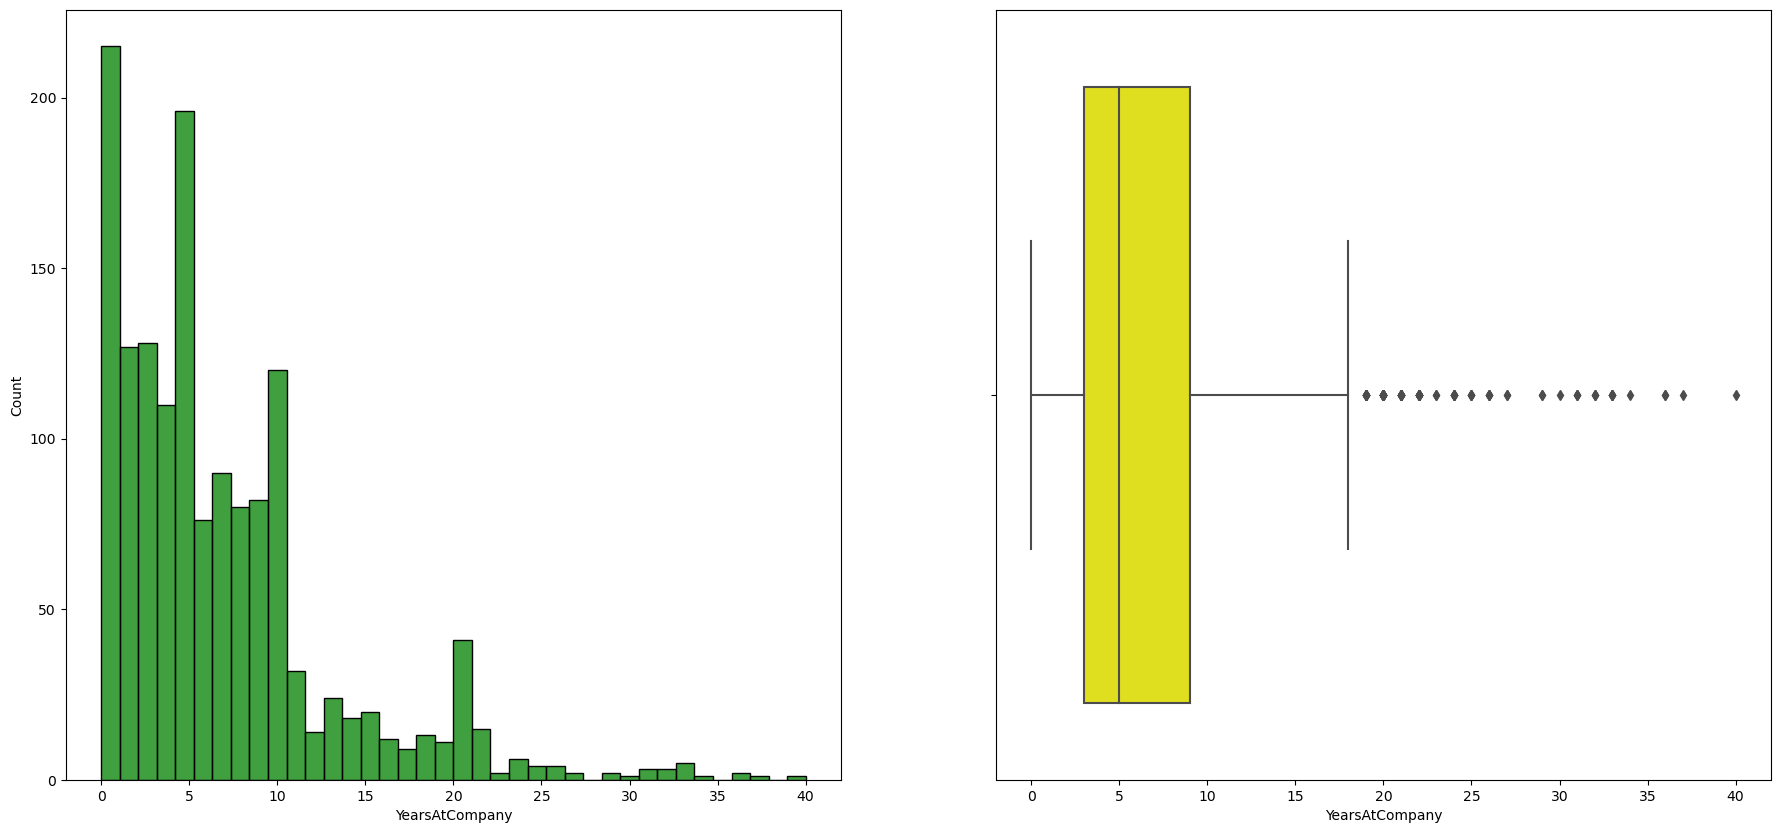

In [54]:
##plotting the graph to represent the skewness of data

fig, ax = plt.subplots (1, 2, figsize = (22, 10))
sns.histplot(x = emp_df['YearsAtCompany'], ax = ax[0], color = 'green')
sns.boxplot(x = emp_df['YearsAtCompany'], ax = ax[1], color = 'yellow')
plt.show()

In [69]:
## AGE

info_of_numerical('Age')

The mean of the Age is 36.93015214384509
------------------------------------------------------------
The median of the Age is 36.0
------------------------------------------------------------
The mode of the Age is 34.0
------------------------------------------------------------
The standard deviation of the Age is 9.16220404447615
------------------------------------------------------------
Number of missing values in the Age is 24


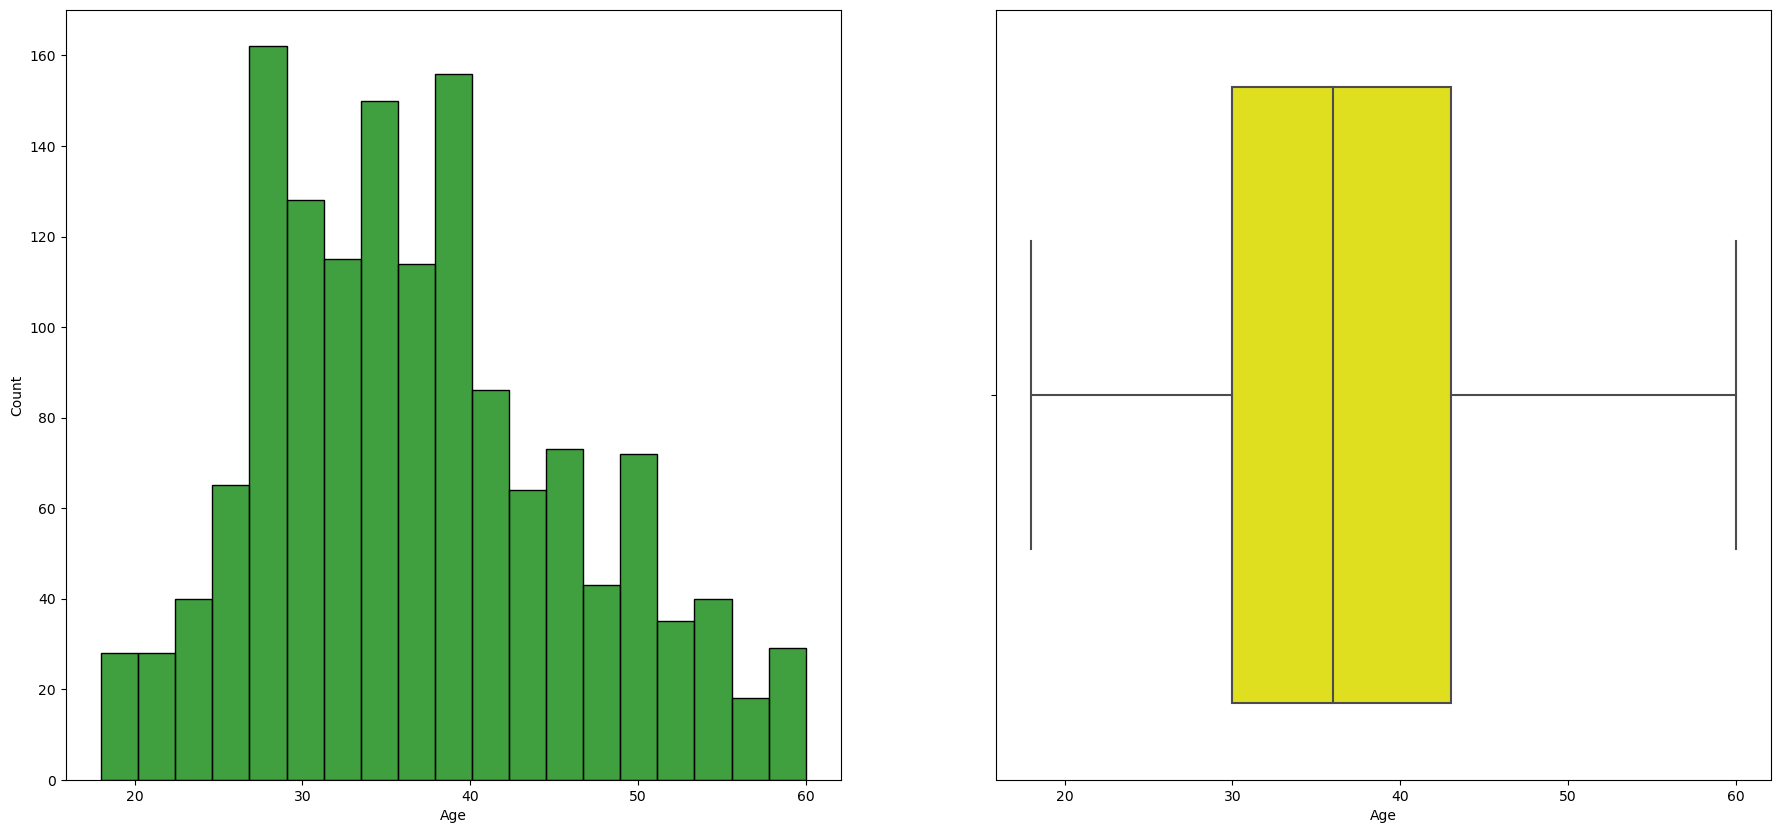

In [70]:
##plotting the graph to represent the skewness of data

fig, ax = plt.subplots (1, 2, figsize = (22, 10))
sns.histplot(x = emp_df['Age'], ax = ax[0], color = 'green')
sns.boxplot(x = emp_df['Age'], ax = ax[1], color = 'yellow')
plt.show()

TASK 6

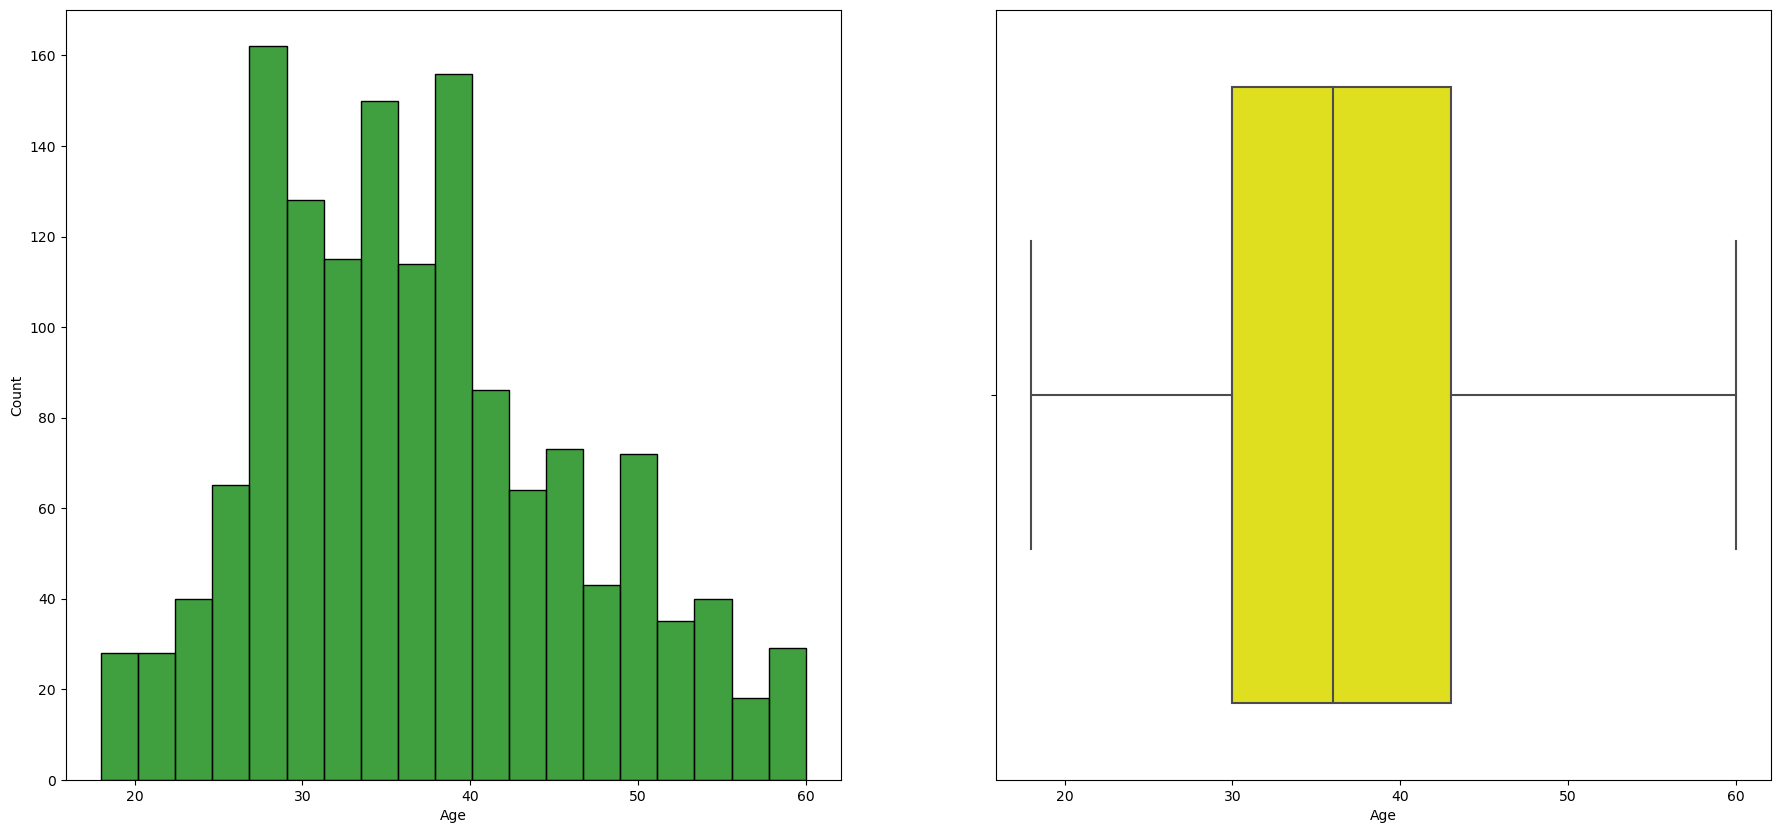

In [77]:
##AGE

fig, ax = plt.subplots (1, 2, figsize = (22, 10))
sns.histplot(x = emp_df['Age'], ax = ax[0], color = 'green')
sns.boxplot(x = emp_df['Age'], ax = ax[1], color = 'yellow')
plt.show()

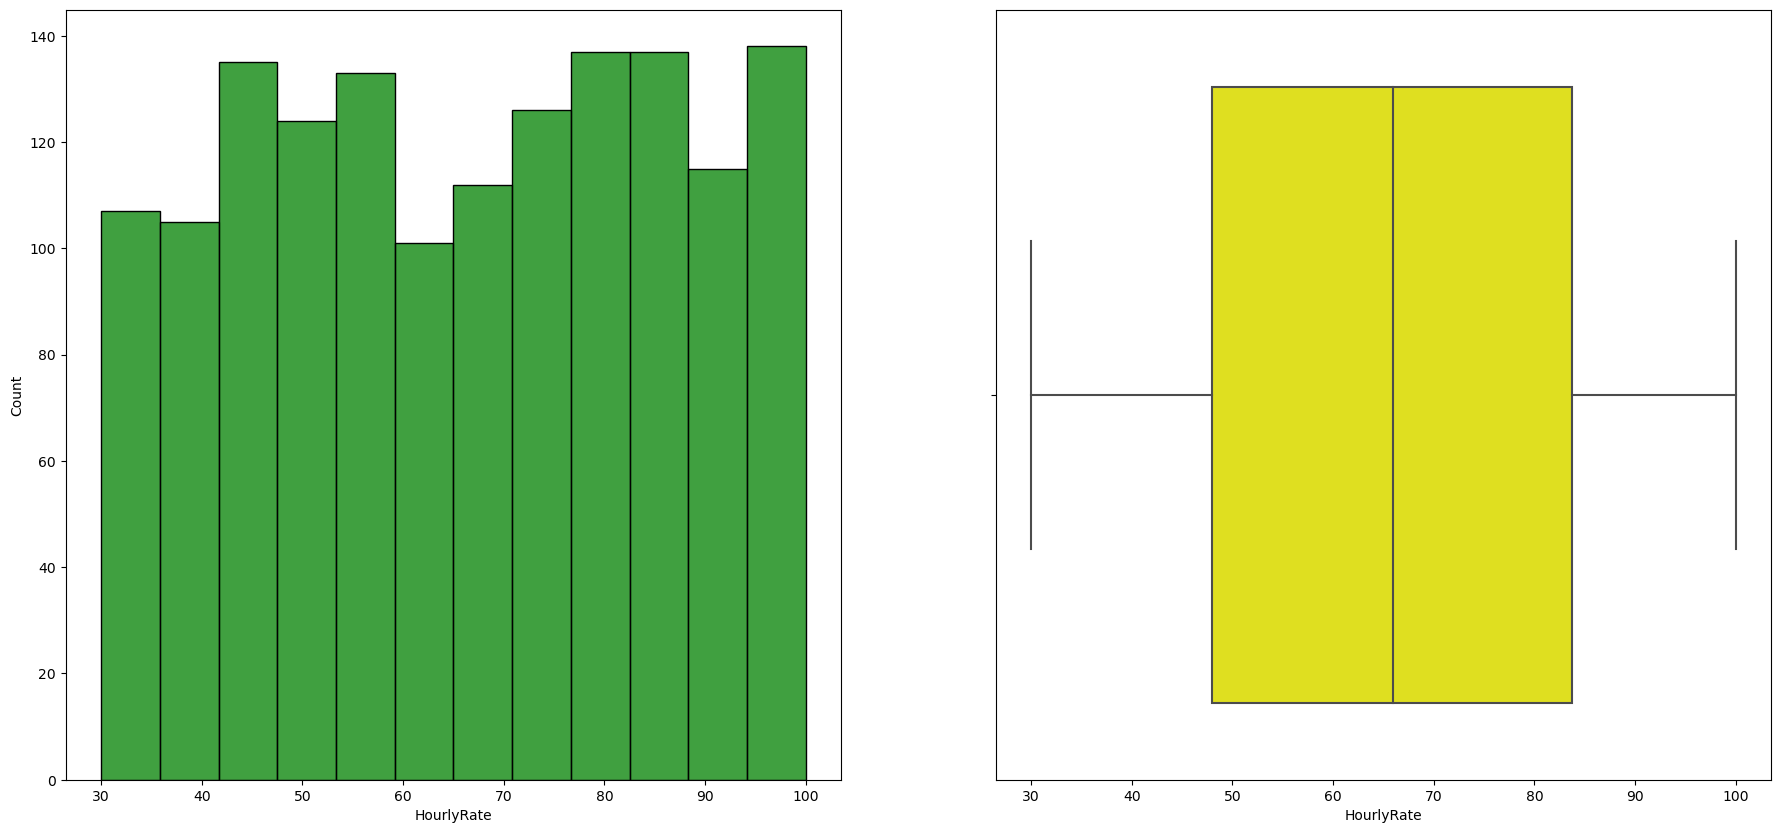

In [78]:
##HOURLY RATE

fig, ax = plt.subplots (1, 2, figsize = (22, 10))
sns.histplot(x = emp_df['HourlyRate'], ax = ax[0], color = 'green')
sns.boxplot(x = emp_df['HourlyRate'], ax = ax[1], color = 'yellow')
plt.show()

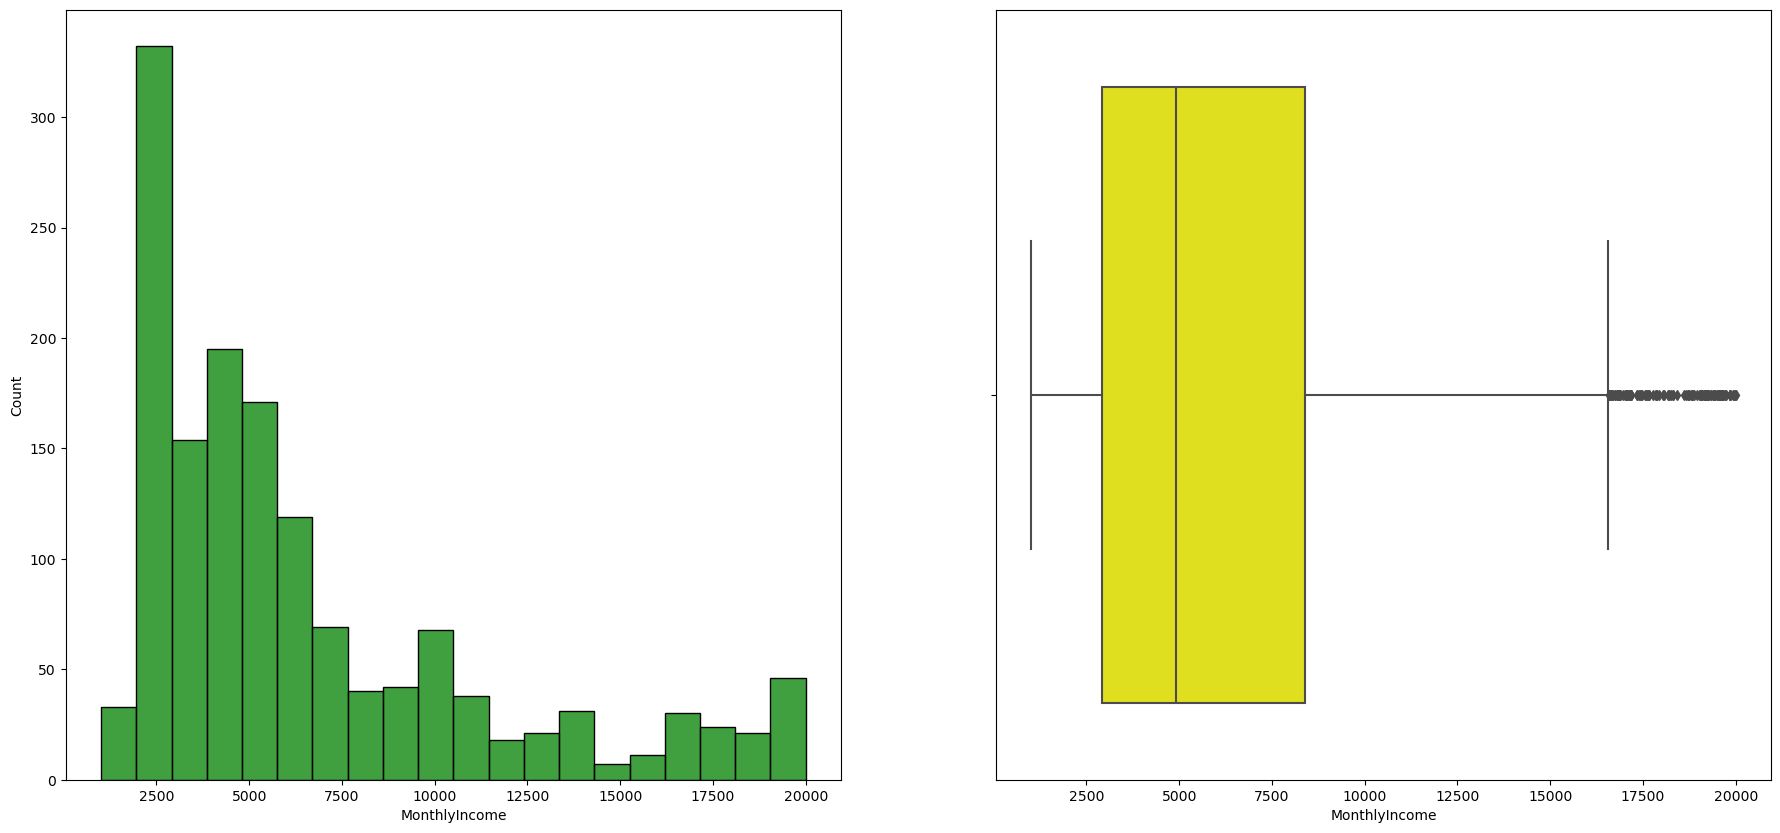

In [79]:
##MONTHLY INCOME

fig, ax = plt.subplots (1, 2, figsize = (22, 10))
sns.histplot(x = emp_df['MonthlyIncome'], ax = ax[0], color = 'green')
sns.boxplot(x = emp_df['MonthlyIncome'], ax = ax[1], color = 'yellow')
plt.show()